# **BIG DATA PROJECT USING CRISP-DM**

By Pablo Gómez, Dani Jiménez & Aniol Mancho

## Table of contents

> Crisp-DM methodology steps

>> Business Understanding

>> Data Understanding


> Data Preparation

>> Removing redundant columns

>> Simplify Date column

>> Delete or transform NaNs

>> PCA (Principal Component Analysis)

> Supervised Learning

>> Regression problem with GLM

>> Regression with logaritmic data

>> Classification with Logistic regression

>> Classification with XGBoost.

> Unsupervised Learning

>> Dimensionality reduction: PCA with Process_Siz, TDP, Die_Size, Transistors, Freq (Non Scaled) / PCA with Process_Siz, TDP, Die_Size, Transistors, Freq (Scaled)

>> Clustering with K-Means: Agglomerative clustering with Cluster dendogram / Non-linear clustering: Spectral Clustering / Non-linear Clustering: Density Clustering



## Crisp-DM methodology steps

The main steps of this methodology are:


*   Business Understanding
*   Data Understanding
*   Data Preparation
*   Modelling 
  *   Supervised Learning
  *   Unsupervised Learning
*   Evaluation
*   Deployment

This methodology tries to keep up-to-date the project even after the main release to the market is done, as to keep its validity. Thus, a certain organisation is to be followed.






## Business Understanding

To better understand the data we must first understand the environment in which the data has been gathered (CPU & GPU final products in the market dataset)

**Understand the current needs of clients in the said market:**

*   Big data requires the processing of massive amounts of data, so better CPUs that can handle more operations per second are required

*   Graphical advances in games, computational design, realistic simulations, etc, require better GPUs

*   The CPU and GPU market is ruled by few companies, so data analysis studies can give an important competitive advantage and a guide to the standards they must accomplish to be competitive




## Data Understanding

**Dataset main characteristics:**

*   21 years of worldwide market coverage (from 1/3/2000 to 15/4/2021).
*   Mid size dataset: 14 columns & 4.853 Observations.
*   Column data format: categorical and numerical

First, we must upload the dataset in the development environment (Google Colab):

In [ ]:
#DONT TOUCH THIS CHUNK OF CODE ._.
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Use google librarie to import the .csv file from our drive
from google.colab import drive
drive.mount("/content/gdrive")

#Import the uploaded dataset 
hardware = pd.read_csv('/content/gdrive/My Drive/chip_dataset.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


First thing to do, examine the data type of each of the dataset columns.

In [ ]:
#The names and types of each column are the following:
hardware.dtypes

Unnamed: 0                 int64
Product                   object
Type                      object
Release Date              object
Process Size (nm)        float64
TDP (W)                  float64
Die Size (mm^2)          float64
Transistors (million)    float64
Freq (MHz)               float64
Foundry                   object
Vendor                    object
FP16 GFLOPS              float64
FP32 GFLOPS              float64
FP64 GFLOPS              float64
dtype: object

Now we would like to see how typical rows of the dataset look like:

In [ ]:

#We can see that the first column of the dataset, called 'Unnamed:0' is redundant, 
#shows the exact same information as the index column, so we will delete it
hardware1 = hardware.drop(columns = ['Unnamed: 0'])

#If we make a describe again, we can see that the fisrt column has been deleted
hardware1.describe

<bound method NDFrame.describe of                       Product Type Release Date  Process Size (nm)  TDP (W)  \
0         AMD Athlon 64 3500+  CPU   2007-02-20               65.0     45.0   
1            AMD Athlon 200GE  CPU   2018-09-06               14.0     35.0   
2        Intel Core i5-1145G7  CPU   2020-09-02               10.0     28.0   
3       Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0     80.0   
4     AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0    125.0   
...                       ...  ...          ...                ...      ...   
4849      NVIDIA Quadro 3000M  GPU   2011-02-22               40.0     75.0   
4850            Intel GMA 950  GPU   2005-06-01               90.0      7.0   
4851   NVIDIA GeForce GT 320M  GPU   2010-03-03               40.0     23.0   
4852   NVIDIA GeForce FX 5200  GPU   2003-03-06              150.0      NaN   
4853   NVIDIA GeForce 9300 SE  GPU   2008-06-01               65.0      NaN   

      Die Size (m

## Data Preparation

Once we have had a look at the most basic aspects of the dataset, we will try to prepare the data to be manipulated later on. As to make it fit, we will remove innecessary columns, add new ones with crytical information and remove missing values.

The first data preparation consists in adding a new column "Date" to classify the years (YYYY format) derived from the "Release Date" column in DD-MM--YYYY format. At the same time, we delete the rows without recorded launch date.

In [ ]:
#We shorten the dates format to just years 
sorted = hardware1

def slice(date):
    date_as_string = date[:4]  #Reduce string
    return (date_as_string)

sorted['Date'] =sorted['Release Date'].apply(slice)

#Sort the dataset by year
sorted = sorted.sort_values(by='Release Date')

#Remove the last 121 observations that correspond to undefined dates 
sorted.drop(sorted.index[-121:], inplace=True)


We now show some histograms of diferent column values against the "Date" column.

<Axes: xlabel='Date'>

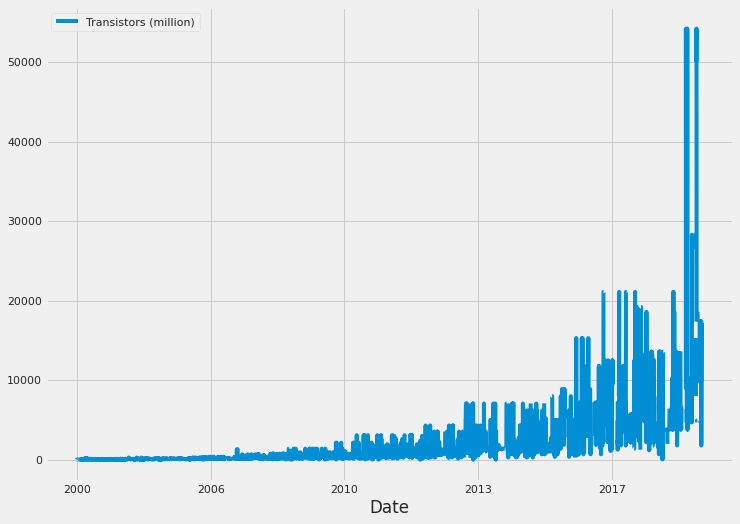

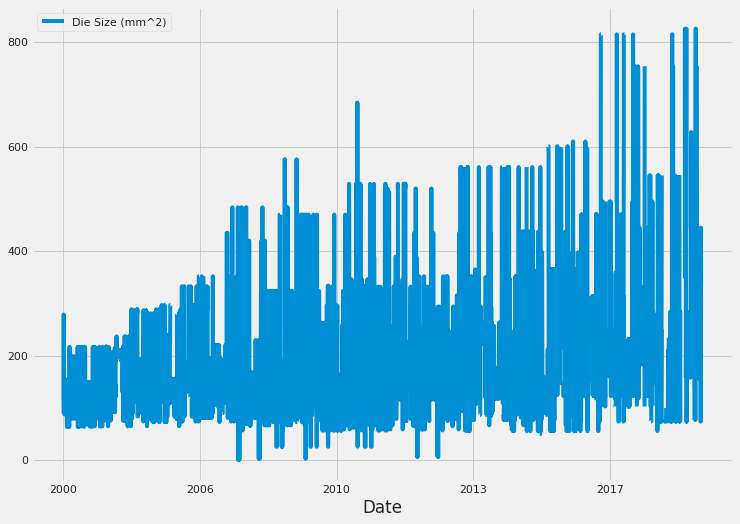

In [ ]:
#Plot date vs number of transistors 
sorted.plot(x='Date', y ='Transistors (million)')

#Plot date vs TDP
sorted.plot(x='Date', y ='TDP (W)')

#Plot date vs Die Size
sorted.plot(x='Date', y ='Die Size (mm^2)')

#This plot shows the representation of the Moore's law, that explains that the number of transistors duplicates each 2 years



In those graphs, we get a lot of valuable information. The most important one is a confirmation of the Moore's law from the evolution of transistor count throughout the years (almost exponential and doubling every 2 years).

## Delete or transform NaNs

First and foremost, we will have to study the magnitude of the NaNs problem in our dataset.

In [ ]:
underline = '\33[4m'
underline_end='\33[0m'

# Some columns, especially the ones corresponding to GFlops, have missing vaules (NaN). The function isnull().sum() tells the total amount of NaN values for each column
print(underline+"NA per column"+underline_end)

NA = (sorted.isnull()).sum()
print(NA)

#The percentage of NaN for column gives a more meaningful information about the 
print(underline+"\nNA per column in %"+underline_end)
print(NA/(len(sorted))*100)

NA per column
Product                     0
Type                        0
Release Date                0
Process Size (nm)           6
TDP (W)                   617
Die Size (mm^2)           670
Transistors (million)     661
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4224
FP32 GFLOPS              2842
FP64 GFLOPS              3469
Date                        0
dtype: int64

NA per column in %
Product                   0.000000
Type                      0.000000
Release Date              0.000000
Process Size (nm)         0.126769
TDP (W)                  13.036129
Die Size (mm^2)          14.155926
Transistors (million)    13.965772
Freq (MHz)                0.000000
Foundry                   0.000000
Vendor                    0.000000
FP16 GFLOPS              89.245722
FP32 GFLOPS              60.046482
FP64 GFLOPS              73.293894
Date                      0.000000
dtype: float64


<Axes: >

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



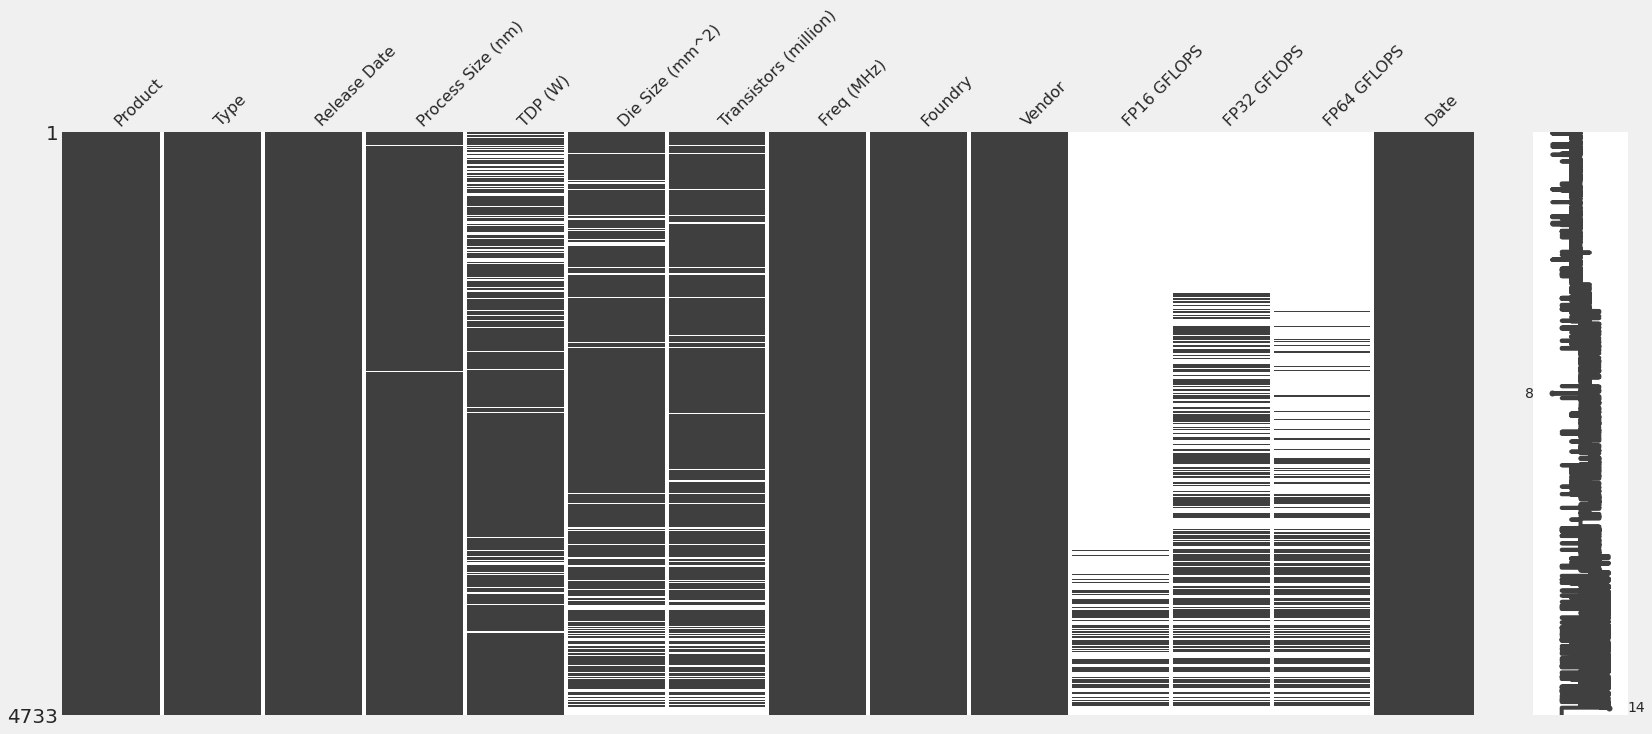

In [ ]:
# The proportion of NaN values can also be visualized graphically:
import missingno as msno
msno.matrix(sorted)


In the last rows 'FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS', we have a number of cases with NA greater than 50%. In this first time, we will just delete them. We store that new dataset as "sorted1".

In [ ]:
#We remove the rows in 'FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS' as they have a NA value greater than 50%.
sorted1 = sorted.drop(columns = ['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'])


As for the second and third option of imputing mean of the values with the same GPU/CPU type and the same year, we need to designate the diferent means for each year.

In [ ]:
# Select Rows Based on the Values in the Date column and calculate the mean

process = sorted1.groupby("Date")["Process Size (nm)"].mean()
power = sorted1.groupby("Date")["TDP (W)"].mean()
die = sorted1.groupby("Date")["Die Size (mm^2)"].mean()
transistors = sorted1.groupby("Date")["Transistors (million)"].mean()

titles = {"Process Size (nm)": process, "TDP (W)": power, "Die Size (mm^2)": die, "Transistors (million)": transistors}

resume = pd.DataFrame(titles)
print(resume)

      Process Size (nm)     TDP (W)  Die Size (mm^2)  Transistors (million)
Date                                                                       
2000         186.000000   39.161290       113.282609              30.045455
2001         147.537313   54.420000       118.621212              57.187970
2002         146.203704   61.957447       116.421569              50.537736
2003         136.648649   62.010000       144.075949              79.845304
2004         115.413534   70.500000       158.439655             113.565737
2005         100.341365   76.776596       159.909091             147.670940
2006          84.356061   65.301370       171.652174             241.991561
2007          77.246696   62.129730       160.869767             282.750000
2008          61.526316   83.089888       183.641221             446.961390
2009          49.155251   73.166667       181.226244             572.217195
2010          41.689655   65.897527       170.871528             746.500000
2011        

### Removing NaNs

In our first approach of the NaNs treatment, we will just delete the observations with missing values.

In [ ]:
#We erase the rows with a NaN value
 
DataSetSenseNulls = sorted1[sorted1.isnull().sum(axis=1) < 1]
DataSetSenseNulls

#As we can see, now this dataset doesnt have any NaN
NA1 = (DataSetSenseNulls.isnull()).sum()
print(NA1)


Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (MHz)               0
Foundry                  0
Vendor                   0
Date                     0
dtype: int64


### Exchange NaNs for the mean of the selected variable 

As the second option, we impute the missing values with the mean of the column.


In [ ]:
# We select columns of the dataset with numerical data and NaN values:


sinnan = sorted1[["Process Size (nm)", "TDP (W)", "Die Size (mm^2)", "Transistors (million)"]]
print(sinnan)
print(sinnan.isnull().sum())


      Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors (million)
4421              150.0      NaN              NaN                    NaN
4357              250.0      NaN             90.0                   15.0
3074              250.0     79.0            279.0                   54.0
3721              180.0     23.0            115.0                   30.0
3500              180.0     23.0            111.0                   30.0
...                 ...      ...              ...                    ...
1707               14.0    150.0              NaN                    NaN
2014               10.0    185.0              NaN                    NaN
34                 10.0    270.0              NaN                    NaN
1438               14.0    205.0              NaN                    NaN
887                10.0    265.0              NaN                    NaN

[4733 rows x 4 columns]
Process Size (nm)          6
TDP (W)                  617
Die Size (mm^2)          670
Transistors 

In [ ]:
# Data imputation to replace NaN values with the mean of an entire column:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean');
sinnan["Process Size (nm)"] = mean_imputer.fit_transform(sinnan["Process Size (nm)"].values.reshape(-1,1));
sinnan["TDP (W)"] = mean_imputer.fit_transform(sinnan["TDP (W)"].values.reshape(-1,1));
sinnan["Die Size (mm^2)"] = mean_imputer.fit_transform(sinnan["Die Size (mm^2)"].values.reshape(-1,1));
sinnan["Transistors (million)"] = mean_imputer.fit_transform(sinnan["Transistors (million)"].values.reshape(-1,1));

<ipython-input-241-6aaf57f36488>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-241-6aaf57f36488>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-241-6aaf57f36488>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-241-6aa

In [ ]:
# Check that all the NaN values have been removed
print(sinnan.isnull().sum())

# The imputation of NaNs doesnt change the mean 
print(" ")
print("Mean values per column")
print(sinnan["Process Size (nm)"].mean()) 
print(sinnan["TDP (W)"].mean()) 
print(sinnan["Die Size (mm^2)"].mean()) 
print(sinnan["Transistors (million)"].mean()) 

Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
dtype: int64
 
Mean values per column
55.37275227416967
79.5279397473275
186.61383214373615
1848.244351669941


We can see how our data is very broad, and certain columns follow non lineal paterns of evolution, but are more like exponential growth as in the Transystor count. So we think that we should stick with the mean of the year and not only the general mean of the column for all the years combined.

### Data imputation to replace NaN values with the mean of the corresponding year

We now try imputation with the mean of the value with NaNs as the third option.

In [ ]:
import warnings #We import the warning library 
warnings.filterwarnings("ignore", category=FutureWarning)#We hide all the warnings. Here there was a warning telling us that in the following Pandas versions, the method 'append' will be replaced by 'concad'
# Data imputation to replace NaN values with the mean of the corresponding year, from the RESUME table:
sinnan1 = pd.DataFrame()
year_array= ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"];

for i in range(0,22):
    mean_imputer1_process = SimpleImputer(strategy='constant', fill_value=resume.iloc[i,0]);
    mean_imputer1_tdp = SimpleImputer(strategy='constant', fill_value=resume.iloc[i,1]);
    mean_imputer1_die = SimpleImputer(strategy='constant', fill_value=resume.iloc[i,2]);
    mean_imputer1_trans = SimpleImputer(strategy='constant', fill_value=resume.iloc[i,3]);
    
    df2 = pd.DataFrame()
    df2 = df2.append(sorted[sorted['Date'] == year_array[i]])
    
    df2["Process Size (nm)"] = mean_imputer1_process.fit_transform(df2["Process Size (nm)"].values.reshape(-1,1));
    df2["TDP (W)"] = mean_imputer1_tdp.fit_transform(df2["TDP (W)"].values.reshape(-1,1));
    df2["Die Size (mm^2)"] = mean_imputer1_die.fit_transform(df2["Die Size (mm^2)"].values.reshape(-1,1));
    df2["Transistors (million)"] = mean_imputer1_trans.fit_transform(df2["Transistors (million)"].values.reshape(-1,1));
    sinnan1 = sinnan1.append(df2[["Process Size (nm)", "TDP (W)", "Die Size (mm^2)", "Transistors (million)", "Date"]])

print(sinnan1)

      Process Size (nm)    TDP (W)  Die Size (mm^2)  Transistors (million)  \
4421              150.0   39.16129       113.282609              30.045455   
4357              250.0   39.16129        90.000000              15.000000   
3074              250.0   79.00000       279.000000              54.000000   
3721              180.0   23.00000       115.000000              30.000000   
3500              180.0   23.00000       111.000000              30.000000   
...                 ...        ...              ...                    ...   
1707               14.0  150.00000       301.083333           13452.083333   
2014               10.0  185.00000       301.083333           13452.083333   
34                 10.0  270.00000       301.083333           13452.083333   
1438               14.0  205.00000       301.083333           13452.083333   
887                10.0  265.00000       301.083333           13452.083333   

      Date  
4421  2000  
4357  2000  
3074  2000  
3721  2000 

In [ ]:
# Check that all the NaN values have been removed

print(sinnan1.isnull().sum())

# Each year has its own mean, but the global mean will not change (mean of means)
print(" ")
print("Mean values per column")
print(sinnan["Process Size (nm)"].mean()) 
print(sinnan["TDP (W)"].mean()) 
print(sinnan["Die Size (mm^2)"].mean()) 
print(sinnan["Transistors (million)"].mean()) 

Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Date                     0
dtype: int64
 
Mean values per column
55.37275227416967
79.5279397473275
186.61383214373615
1848.244351669941


Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (MHz)               0
Foundry                  0
Vendor                   0
Date                     0
dtype: int64


<Axes: >

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



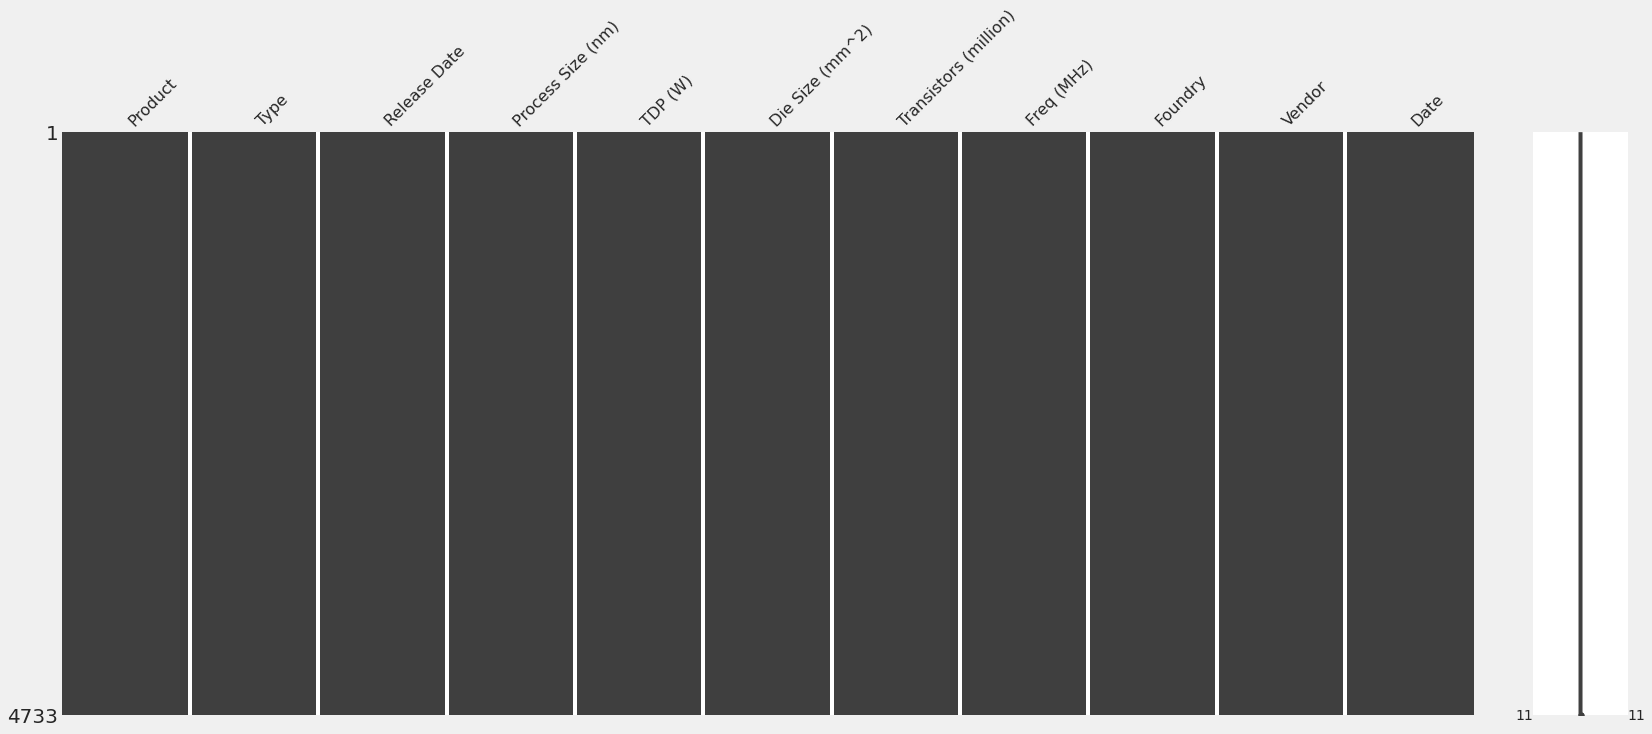

In [ ]:
# After that, we just have to add the obtained columns to a clean dataset

clean_dataset = sorted
clean_dataset = clean_dataset.drop(columns = ['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'])
clean_dataset = clean_dataset.drop(columns = ["Process Size (nm)", "TDP (W)", "Die Size (mm^2)", "Transistors (million)"])

clean_dataset.insert(3, "Process Size (nm)", sinnan1.iloc[:,0], True)
clean_dataset.insert(4, "TDP (W)", sinnan1.iloc[:,1], True)
clean_dataset.insert(5, "Die Size (mm^2)", sinnan1.iloc[:,2], True)
clean_dataset.insert(6, "Transistors (million)", sinnan1.iloc[:,3], True)

# Check that there are no NaN values with NaN visualitzation
print((clean_dataset.isnull()).sum())
msno.matrix(clean_dataset)

Graphically, we think that we have succeeded in deleting the missing values and new values (which make sense) have been added.

# Data Understanding of the clean dataset

We will proceed to view the data and its distribution as to understand which rows are more important and which aren't. It will be done thanks to observing the data with histograms, covariance and correlation matrix and principal component analysis.


In [ ]:
#Our final dataset after the data transformation will be:
clean_dataset = clean_dataset.rename(columns={'Release Date': 'Release_Date', 'Process Size (nm)': 'Process_Size','TDP (W)': 'TDP', 'Die Size (mm^2)': 'Die_Size','Transistors (million)': 'Transistors', 'Freq (MHz)': 'Freq'})

clean_dataset

Product Type Release_Date  Process_Size        TDP  \
4421           Intel i815 Graphics  GPU   2000-01-01         150.0   39.16129   
4357               NVIDIA Vanta LT  GPU   2000-03-01         250.0   39.16129   
3074  Sony Playstation 2 GPU 250nm  GPU   2000-03-04         250.0   79.00000   
3721                ATI Radeon DDR  GPU   2000-04-01         180.0   23.00000   
3500         ATI Radeon 7200 64 MB  GPU   2000-04-01         180.0   23.00000   
...                            ...  ...          ...           ...        ...   
1707     Intel Xeon Platinum 8353H  CPU   2021-04-06          14.0  150.00000   
2014         Intel Xeon Gold 6338N  CPU   2021-04-06          10.0  185.00000   
34        Intel Xeon Platinum 8380  CPU   2021-04-06          10.0  270.00000   
1438     Intel Xeon Platinum 8354H  CPU   2021-04-06          14.0  205.00000   
887       Intel Xeon Platinum 8362  CPU   2021-04-06          10.0  265.00000   

        Die_Size   Transistors    Freq Foundry  Vendor  Date  
4421  113.282609     30.045455   133.0   Intel   Intel  2000  
4357   90.000000     15.000000   105.0    TSMC  NVIDIA  2000  
3074  279.000000     54.000000   147.0    Sony   Other  2000  
3721  115.000000     30.000000   166.0    TSMC     ATI  2000  
3500  111.000000     30.000000   166.0    TSMC     ATI  2000  
...          ...           ...     ...     ...     ...   ...  
1707  301.083333  13452.083333  2500.0   Intel   Intel  2021  
2014  301.083333  13452.083333  2200.0   Intel   Intel  2021  
34    301.083333  13452.083333  2300.0   Intel   Intel  2021  
1438  301.083333  13452.083333  3100.0   Intel   Intel  2021  
887   301.083333  13452.083333  2800.0   Intel   Intel  2021  

[4733 rows x 11 columns]

## Basic histograms & Boxplots

After having the dataset cleaned, we can start interpreting the data. With histograms and boxplots the interpretation is made easy.

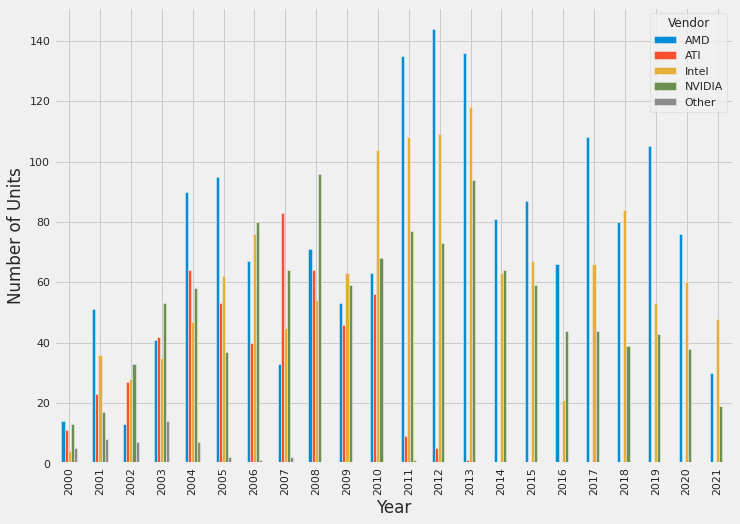

<Figure size 1152x432 with 0 Axes>

In [ ]:
# Histogram representation for the main vendors per year
grouped = clean_dataset.groupby(['Date','Vendor']).size()

grouped.unstack().plot(kind='bar',stacked = False)

plt.ylabel("Number of Units")
plt.xlabel("Year")

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)

plt.show()

In the previous histogram we can see how the market count of different brands fluctuate overtime.

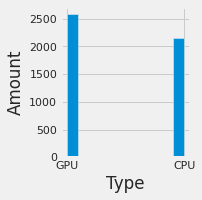


CPU [%]: 45.426
GPU [%]: 54.574


In [ ]:
# Histogram representation is a visual manner to understand data
clean_dataset['Type'].hist(figsize=(3,3),orientation='vertical')
plt.ylabel('Amount')
plt.xlabel('Type')
plt.show()

# % Of each type
print("\nCPU [%]:" ,round(((sum(clean_dataset['Type'] =='CPU')/4733)*100),3))
print("GPU [%]:" ,round(((sum(clean_dataset['Type'] =='GPU')/4733)*100),3))

In this histogram, we can see that our dataset is split pretty evenly between CPUs and GPUs.

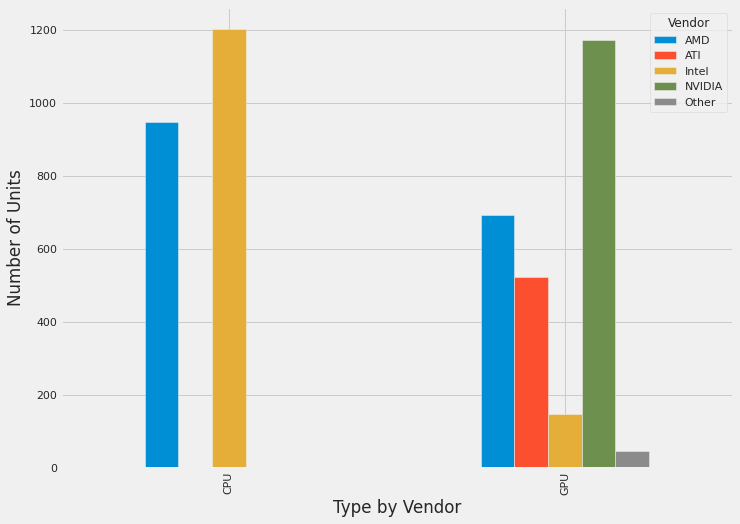

In [ ]:
# Histogram representation for the main vendors per year
grouped1 = clean_dataset.groupby(['Type','Vendor']).size()

grouped1.unstack().plot(kind='bar',stacked = False)

plt.ylabel("Number of Units")
plt.xlabel("Type by Vendor")

plt.show()

In the previous graph, we can see how Intel and AMD monopolize the CPU market while the GPU is divided in more manufacturers. This observation will be useful later on the project, as this implies that certain vendors will be a perfect predictor of CPU / GPU type (for example, having NVIDIA as input will 100% get a GPU output).

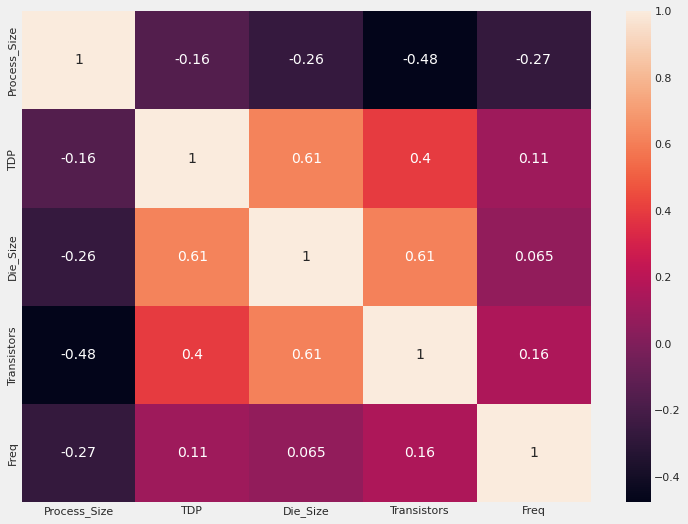

In [ ]:
#Correlation Matrix with seaborn
import seaborn as sn
corr_matrix = clean_dataset.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

With this matrix, we can see the correlation between the different columns. With it, a high correlation between TDP and Die_Size is observed.

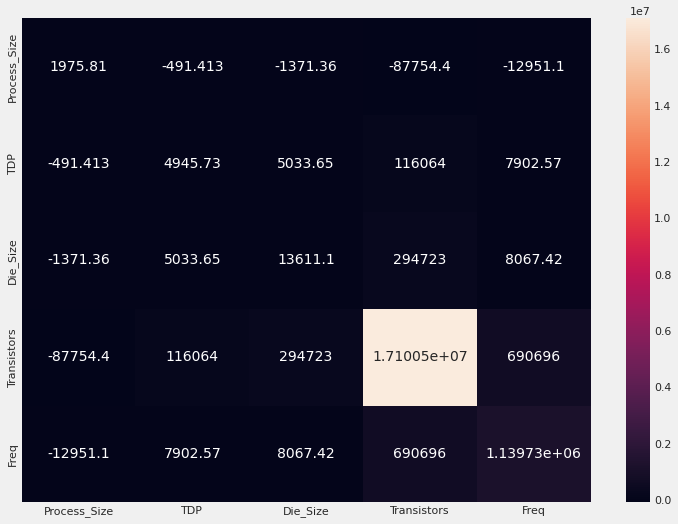

In [ ]:
# Covariance Matrix with seaborn
import seaborn as sn
cov_matrix = pd.DataFrame.cov(clean_dataset)
sn.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

In [ ]:
# Provided the exponential growth of the data, the dataset isn't asymetric, so the points
# outside the box plots are meaningful and not outliers to be removed

import plotly.express as plotly
plotly.box(data_frame=clean_dataset, x='Release_Date', color="Type")


With this boxplot, we can see how the dataset is divided in the different years, with the bulk of it recorded between 2007 and 2015.

In [ ]:
plotly.box(data_frame=clean_dataset, x='Process_Size', color="Type")


In [ ]:
plotly.box(data_frame=clean_dataset, x='Transistors', color="Type")


In [ ]:
plotly.box(data_frame=clean_dataset, x='Die_Size', color="Type")


In [ ]:
plotly.box(data_frame=clean_dataset, x='TDP', color="Type")


With the previous boxplots, a lot of outliers are detected. This makes us think that having new products mixed with old one, makes the newest product seem as outliers caused by their much proficient performance metrics. So no further actions are taken as to prepare the dataset.

<Axes: xlabel='Date', ylabel='Transistors'>

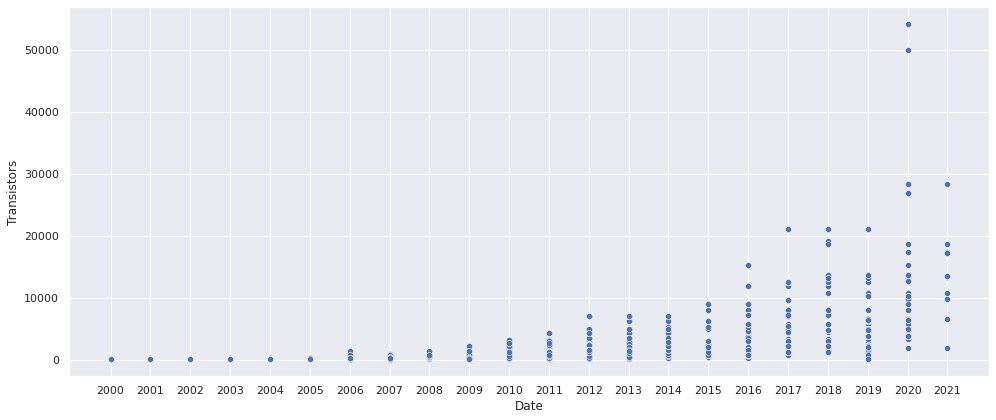

In [ ]:

x = clean_dataset["Date"]
y = clean_dataset["Transistors"]
sn.set(rc={"figure.figsize":(14, 6)}) #width=3, #height=4
sn.scatterplot(x=x, y=y, data=clean_dataset)

## PCA (Principal Component Analysis)

With PCA, we will apply a technic to determinate the most important rows. Ultimately, this can lead us to reduce the dimensionality of the problem deleting the least significant columns. 

In [ ]:
#We hot encode our categorical data
one_hot_encoded_data = pd.get_dummies(clean_dataset, columns = ['Type','Vendor'])
(one_hot_encoded_data)

#We remove the categorical data that hasnt been encoded
clean_dataset1=one_hot_encoded_data.iloc[:, [2, 3, 4, 5, 6, 9, 10, 11,12,13,14,15]]


#We will do the PCA of the dataset

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(clean_dataset1)

clean_dataset1_pca = pca.transform(clean_dataset1)



color = clean_dataset1['Type_CPU']

# Make an array of colors depending on the value of the type column 
colors = ['green' if val == 1 else 'blue' for val in color]


#Make an scatter plot of the pca information
plt.scatter(clean_dataset1_pca[:, 0], clean_dataset1_pca[:, 1], c =colors)
plt.legend(handles=[plt.Line2D([], [], marker='o', color='green', label='CPU'),
                    plt.Line2D([], [], marker='o', color='blue', label='GPU')])

#We define the labels
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Gráfico de dispersión del PCA')

#Plot the PCA
plt.show()




This PCA analysis don't let us see a lot of information, althought some kind of diferentiation between the GPU and the CPU groups is observed.

      Process_Size        TDP    Die_Size   Transistors    Freq  Type_CPU  \
4421         150.0   39.16129  113.282609     30.045455   133.0         0   
4357         250.0   39.16129   90.000000     15.000000   105.0         0   
3074         250.0   79.00000  279.000000     54.000000   147.0         0   
3721         180.0   23.00000  115.000000     30.000000   166.0         0   
3500         180.0   23.00000  111.000000     30.000000   166.0         0   
...            ...        ...         ...           ...     ...       ...   
1707          14.0  150.00000  301.083333  13452.083333  2500.0         1   
2014          10.0  185.00000  301.083333  13452.083333  2200.0         1   
34            10.0  270.00000  301.083333  13452.083333  2300.0         1   
1438          14.0  205.00000  301.083333  13452.083333  3100.0         1   
887           10.0  265.00000  301.083333  13452.083333  2800.0         1   

      Type_GPU  Vendor_AMD  Vendor_ATI  Vendor_Intel  Vendor_NVIDIA  \
4421

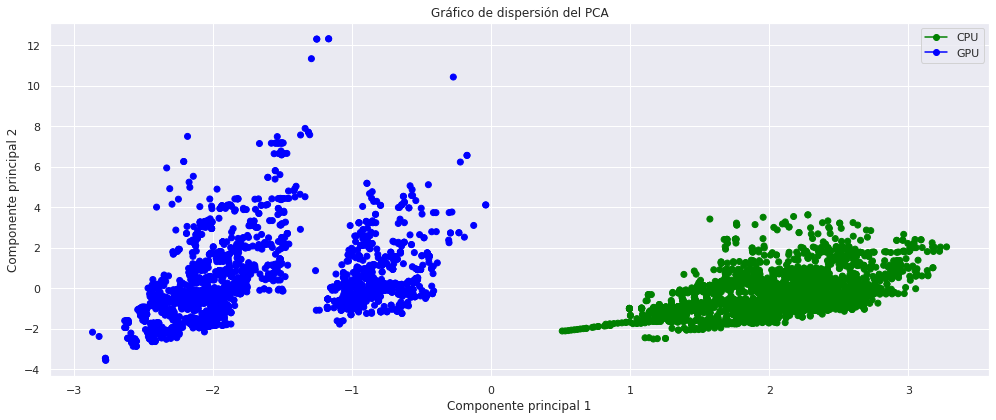

     0            1
0  PC1  Transistors
1  PC2    Frequency


In [ ]:
#We hot encode our categorical data
one_hot_encoded_data = pd.get_dummies(clean_dataset, columns = ['Type','Vendor'])
(one_hot_encoded_data)


#We remove the categorical data that hasnt been encoded
clean_dataset1=one_hot_encoded_data.iloc[:, [2, 3, 4, 5, 6, 9, 10, 11,12,13,14,15]]
print(clean_dataset1)

from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(clean_dataset1)
Scaled_data1=scaling.transform(clean_dataset1)

#We will do the PCA of the dataset

from sklearn.decomposition import PCA

pca1 = PCA(n_components=2).fit(Scaled_data1)

clean_dataset11_pca = pca1.transform(Scaled_data1)



color_pca1 = clean_dataset1['Type_GPU']

# Make an array of colors depending on the value of the type column 
colors_pca1 = ['green' if val == 0 else 'blue' for val in color_pca1]


#Make an scatter plot of the pca information
plt.scatter(clean_dataset11_pca[:, 0], clean_dataset11_pca[:, 1], c =colors_pca1)
plt.legend(handles=[plt.Line2D([], [], marker='o', color='green', label='CPU'),
                    plt.Line2D([], [], marker='o', color='blue', label='GPU')])

#We define the labels
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Gráfico de dispersión del PCA')

#Plot the PCA
plt.show()


	#Process_Size	TDP	Die_Size	Transistors	Freq	


n_pcs= pca1.components_.shape[0]
variables = ['Process_Size','TDP','Die_Size','Transistors','Frequency'] #Names of the diferent variables

# with pca.components_[i] we get the 'importance' of each variable on the pca, if we pick the max it will give us the most important variable
most_important_index1 = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_variable1 = [variables[int(i)] for i in (most_important_index1)] #With the index, we get the variable name
dic = {'PC{}'.format(i+1): most_important_variable1[i] for i in range(n_pcs)} #We create a dictionary with the PCAx and the most important variable

df = pd.DataFrame(dic.items())

print(df) 

Finally, with an scalation of the Principal components, we can see a clear diferentiation between the two groups. We know want to know which variables were the most relevant.

In [ ]:
for i in ((most_important_index1)):
  print(variables[int(i)])



Transistors
Frequency


We see that transistor count and frequency are the two most important factors in the PCA analysis. Their diference in magnitudes makes the scalability need more clear.

In [ ]:
	#Process_Size	TDP	Die_Size	Transistors	Freq	


n_pcs= pca.components_.shape[0]
print(n_pcs)
variables = ['Process_Size','TDP','Die_Size','Transistors','Frequency'] #Names of the diferent variables
# with pca.components_[i] we get the 'importance' of each variable on the pca, if we pick the max it will give us the most important variable
most_important_index = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
print(most_important_index)
most_important_variable = [variables[most_important_index[i]] for i in range(n_pcs)] #With the index, we get the variable name
dic = {'PC{}'.format(i+1): most_important_variable[i] for i in range(n_pcs)} #We create a dictionary with the PCAx and the most important variable

df = pd.DataFrame(dic.items())

print(df) 



2
[3, 4]
     0            1
0  PC1  Transistors
1  PC2    Frequency


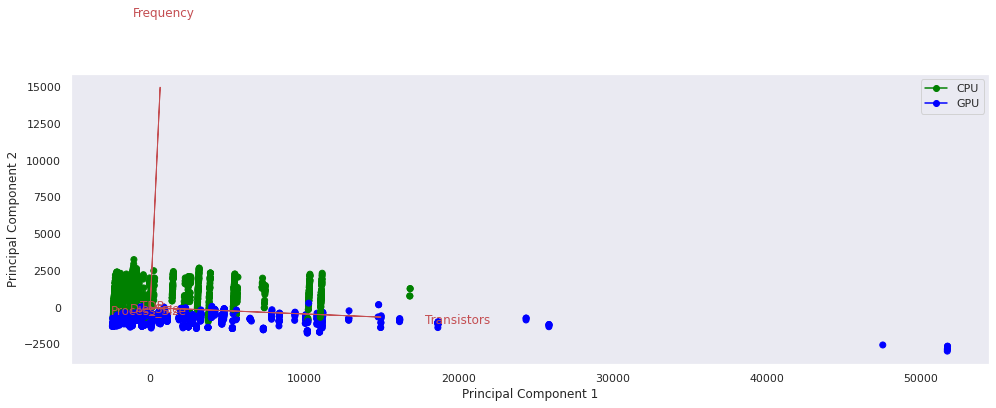

[0.93844132 0.06078598]
[[5.14991544e-03 6.79236258e-03 1.72155753e-02 9.98884123e-01
  4.31448077e-02 5.35483514e-07 5.35483514e-07 1.37932102e-06
  1.37656246e-05 7.20840615e-06 6.54204566e-06 1.36414824e-06]
 [8.25645768e-03 2.59791611e-03 4.22286545e-03 4.31382381e-02
  9.99022484e-01 4.06961991e-04 4.06961991e-04 8.11162899e-05
  9.09658244e-05 2.00353989e-04 1.80158386e-04 1.03460687e-05]]


In [ ]:

n = 5   #Our PCA uses only 5 iterations
labels = ['Process_Size','TDP','Die_Size','Transistors','Frequency']
coeff = np.transpose(pca.components_[0:2, :])
plt.scatter(clean_dataset1_pca[:, 0], clean_dataset1_pca[:, 1], c =colors)
plt.legend(handles=[plt.Line2D([], [], marker='o', color='green', label='CPU'), plt.Line2D([], [], marker='o', color='blue', label='GPU')])
for i in range(n):
    plt.arrow(0, 0, coeff[i,0]*15000, coeff[i,1]*15000,color = 'r',alpha = 1)
    plt.text(coeff[i,0]* 20000, coeff[i,1] * 20000, labels[i], color = 'r', ha = 'center', va = 'center')


plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()

#Call the function. Use only the 2 PCs.
#myplot(clean_dataset1_pca[:,0:2],np.transpose(pca.components_[0:2, :]),['Process_Size','TDP','Die_Size','Transistors','Frequency'])
plt.show()

print(pca.explained_variance_ratio_)
print(abs( pca.components_ ))

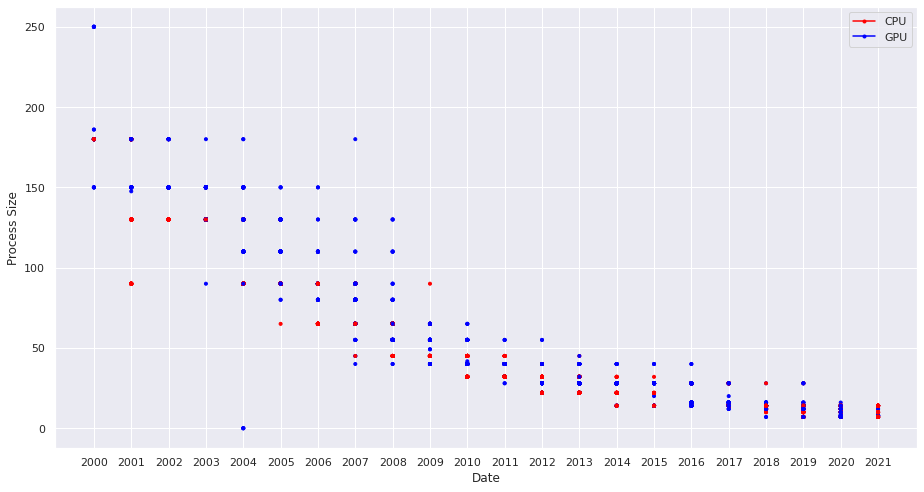

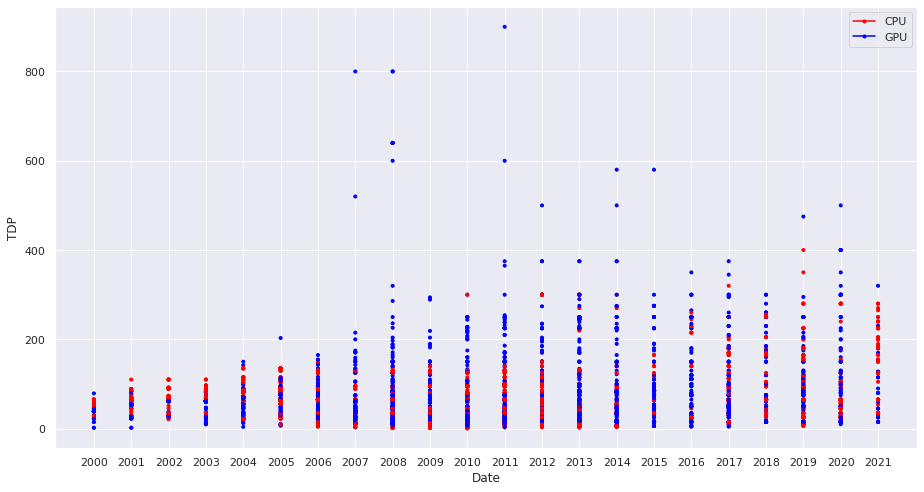

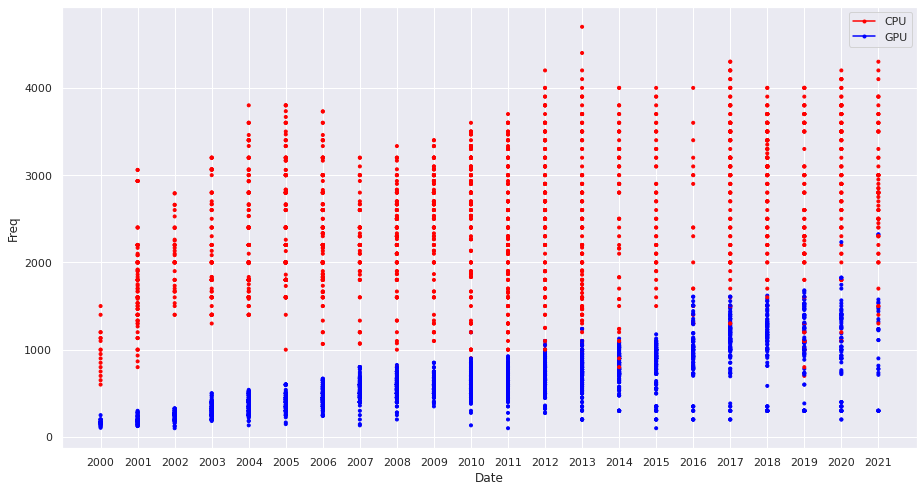

In [ ]:
clean_dataset2=one_hot_encoded_data.iloc[:, [1,2, 3, 4, 5, 6, 9, 10,11]]
color = clean_dataset2['Type_CPU']

colors = ['red' if val == 1 else 'blue' for val in color]


#Grafic scatter plot Data / Transistors
plt.figure(figsize=(13, 7))
plt.scatter(clean_dataset['Date'], clean_dataset['Transistors'], c =colors, marker = '.')
plt.legend(handles=[plt.Line2D([], [], marker='.', color='red', label='CPU'),
                    plt.Line2D([], [], marker='.', color='blue', label='GPU')])
plt.xlabel('Date')
plt.ylabel('Transistors')
plt.show()


#Grafic scatter plot Data / Die Size
plt.figure(figsize=(13, 7))
plt.scatter(clean_dataset['Date'], clean_dataset['Die_Size'], c =colors, marker = '.')
plt.legend(handles=[plt.Line2D([], [], marker='.', color='red', label='CPU'),
                    plt.Line2D([], [], marker='.', color='blue', label='GPU')])

plt.xlabel('Date')
plt.ylabel('Die_Size')
plt.show()


#Grafic scatter plot Data / Process Size
plt.figure(figsize=(13, 7))
plt.scatter(clean_dataset['Date'], clean_dataset['Process_Size'], c =colors, marker = '.')
plt.legend(handles=[plt.Line2D([], [], marker='.', color='red', label='CPU'),
                    plt.Line2D([], [], marker='.', color='blue', label='GPU')])
plt.xlabel('Date')
plt.ylabel('Process Size')
plt.show()


#Grafic scatter plot Data / TDP
plt.figure(figsize=(13, 7))
plt.scatter(clean_dataset['Date'], clean_dataset['TDP'], c =colors, marker = '.')
plt.legend(handles=[plt.Line2D([], [], marker='.', color='red', label='CPU'),
                    plt.Line2D([], [], marker='.', color='blue', label='GPU')])
plt.xlabel('Date')
plt.ylabel('TDP')
plt.show()


#Grafic scatter plot Data / Frequencia
plt.figure(figsize=(13, 7))
plt.scatter(clean_dataset['Date'], clean_dataset['Freq'], c =colors, marker = '.')
plt.legend(handles=[plt.Line2D([], [], marker='.', color='red', label='CPU'),
                    plt.Line2D([], [], marker='.', color='blue', label='GPU')])
plt.xlabel('Date')
plt.ylabel('Freq')
plt.show()



We can see how after representing different scatter plots, the one which makes more sense in diferentiating CPUs and GPUs is the one with frequency and transistor count, just as the PCA said.

# Supervised Learning

Supervised learning is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled datasets to train algorithms to classify data or predict outcomes accurately.

In our project we will aproach it with 4 different.

*   Regression with GLM
*   Regression with logaritmic data
*   Classification with Logistic regression
*   Classification with XGBoost






We look at the correlation matrix as to choose a target variable to predict. To make it easy, it needs to be a column with great correlation with the others (easy to predict).

In [ ]:
#We make a correlation matrix to determine the relations between variables.
corr_matrix = clean_dataset.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

From the presented variables, we choose the number of transistors variable thanks to greatest relation with other variables.

## Regression problem with GLM

Regression problems in supervised learning try to guess the numerical value of a column based on prevously observed data.

A generalized linear model (GLM) is a flexible generalization of ordinary linear regression. It allows the magnitude of the variance of each measurement to be a function of its predicted value. We first run a little test as to check the Transistors - Die_Size correlation and if it can be used in this first approach.




In [ ]:
import statsmodels as sm
import statsmodels.formula.api as smf
import sklearn

# Load data
dat=clean_dataset

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Transistors ~ Die_Size', data=dat).fit()

# Inspect the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            Transistors   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     2817.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:27:54   Log-Likelihood:                -45023.
No. Observations:                4733   AIC:                         9.005e+04
Df Residuals:                    4731   BIC:                         9.006e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1746.1815     91.463    -19.092      0.0

We see that our R squared is pretty little and that P>|t| <0,05. Those metrics are good so we continue with this relation (transistors vs Die_size).

Y =  -1746.1814576977522 + x* 21.653184059646073


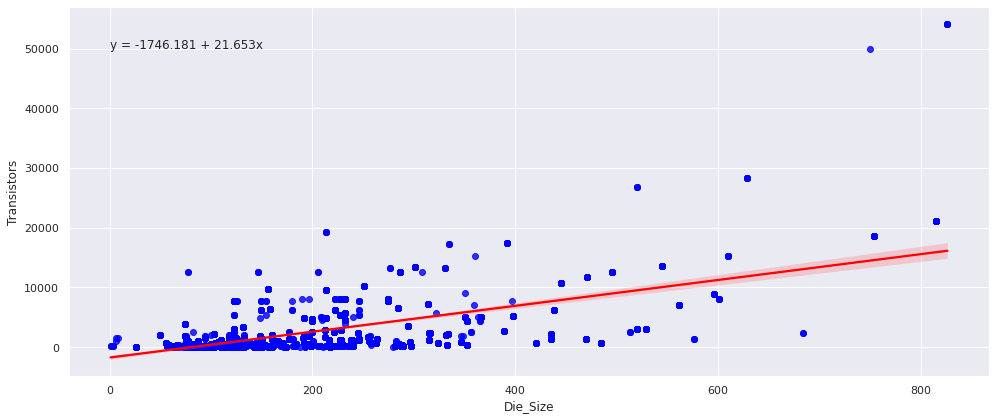

In [ ]:
import scipy

#Put up a regplot of die size against transistor count
p = sn.regplot(x='Die_Size', y ='Transistors', data=clean_dataset, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
plt.text(0, 50000, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
print("Y = ", intercept, "+ x*", slope)


This representation in a graph makes our model look a little off as the observations mostly don't follow the line. We try now to look for other relationships with other columns.

In [ ]:
#Put up a regplot of TDP against transistor count
p = sn.regplot( x='TDP', y ='Transistors', data=clean_dataset, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
plt.text(500, 50000, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
results1 = smf.ols('Transistors ~ TDP', data=dat).fit()

# Inspect the results
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:            Transistors   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     896.3
Date:                Fri, 17 Mar 2023   Prob (F-statistic):          1.69e-180
Time:                        16:27:55   Log-Likelihood:                -45718.
No. Observations:                4733   AIC:                         9.144e+04
Df Residuals:                    4731   BIC:                         9.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    558.1008     82.578      6.758      0.0

The Transistors count against the TDP (power consumed) is also not pretty good.

                            OLS Regression Results                            
Dep. Variable:            Transistors   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     1397.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):          4.46e-268
Time:                        16:27:56   Log-Likelihood:                -45516.
No. Observations:                4733   AIC:                         9.104e+04
Df Residuals:                    4731   BIC:                         9.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4861.4177     84.450     57.566   

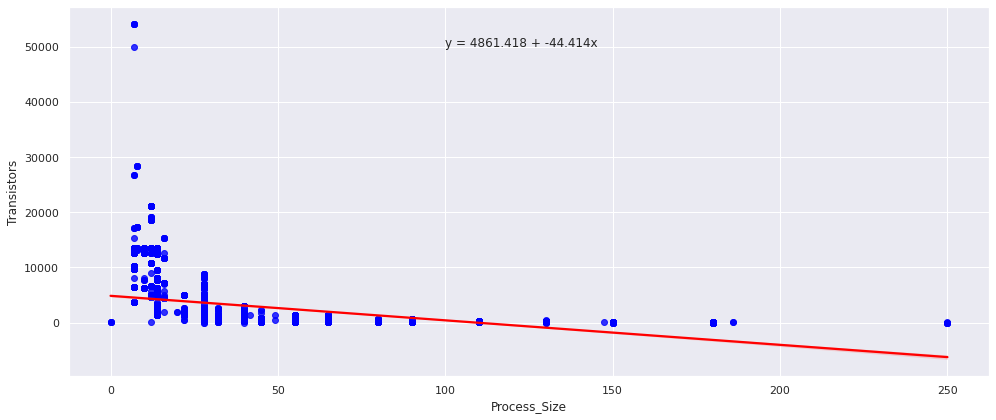

In [ ]:
#Put up a regplot of Process size against transistor count
p = sn.regplot(x='Process_Size', y ='Transistors', data=clean_dataset, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
plt.text(100, 50000, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
results2 = smf.ols('Transistors ~ Process_Size', data=dat).fit()

# Inspect the results
print(results2.summary())

The Transistor count - Process_Size isn't perfect neither.

                            OLS Regression Results                            
Dep. Variable:            Transistors   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     118.7
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           2.56e-27
Time:                        16:27:57   Log-Likelihood:                -46070.
No. Observations:                4733   AIC:                         9.214e+04
Df Residuals:                    4731   BIC:                         9.216e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1498.1205    101.795     14.717      0.0

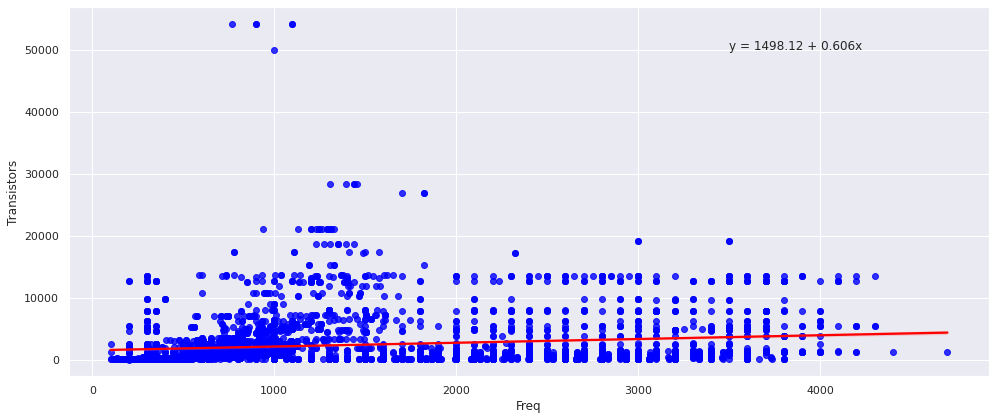

In [ ]:
#Put up a regplot of frequency against transistor count
p = sn.regplot(x='Freq', y ='Transistors', data=clean_dataset, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
plt.text(3500, 50000, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
results4 = smf.ols('Transistors ~ Freq', data=dat).fit()

# Inspect the results
print(results4.summary())

The transistor count against Freq is also pretty bad.

In [ ]:
#Put up a collection of scatter plots to study interrelations.
sn.pairplot(clean_dataset)

We finally represent all the possible relationships in a plots matrix. The transistor count - Die_Size seem to be finally one of the best graphs (linear wise). We now want to start the train and test dataset as to predict values.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# y = number of transistors, x = Die size
x = np.array(clean_dataset["Die_Size"]).reshape((-1,1))
y = np.array(clean_dataset["Transistors"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=123)

# Linear Regression of train data
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train);
score = lr.score(x_test, y_test)
print(score)

#Prediciting Y from Linear regression Model
y_pred = lr.predict(x_test)

# Scatter Plot
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.scatter(x_train, y_train, c ="red")
plt.scatter(x_test, y_test, c ="green", marker= 'X')
plt.legend(['Regression', 'Train data', 'Test data'], loc='lower right')
plt.title("Linear regression with train and test data")
plt.ylabel("Transistors")
plt.xlabel("Die_Size")
plt.text(50, 50000, 'y = ' + str(lr.intercept_) + ' + ' + str(lr.coef_) + 'x')
plt.text(50, 45000, 'RMSE = ' + str(score))
plt.show()

0.3407908604891384


We see graphically the relationship between the test and train dataset in the transistor count - Die_Size relationship. The Root mean squared error is put at 0,34079 which is okay but not amazing. We will now look for other relationships between columns.

0.24902656757566277


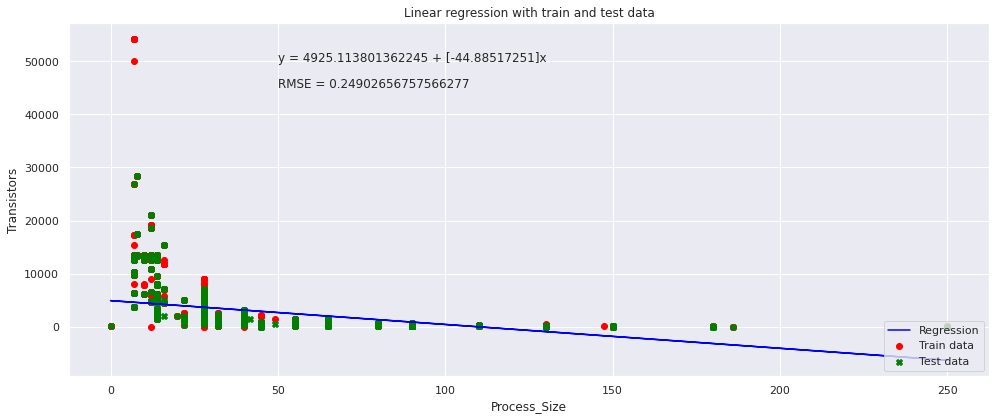

In [ ]:
# y = number of transistors, x = Process Size

x = np.array(clean_dataset["Process_Size"]).reshape((-1,1));
y = np.array(clean_dataset["Transistors"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=123)
lr = LinearRegression().fit(x_train, y_train);
score = lr.score(x_test, y_test)
y_pred = lr.predict(x_test)
print(score)

plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.scatter(x_train, y_train, c ="red")
plt.scatter(x_test, y_test, c ="green", marker= 'X')
plt.legend(['Regression', 'Train data', 'Test data'], loc='lower right')
plt.title("Linear regression with train and test data")
plt.ylabel("Transistors")
plt.xlabel("Process_Size")
plt.text(50, 50000, 'y = ' + str(lr.intercept_) + ' + ' + str(lr.coef_) + 'x')
plt.text(50, 45000, 'RMSE = ' + str(score))
plt.show()

0.1399312572506538


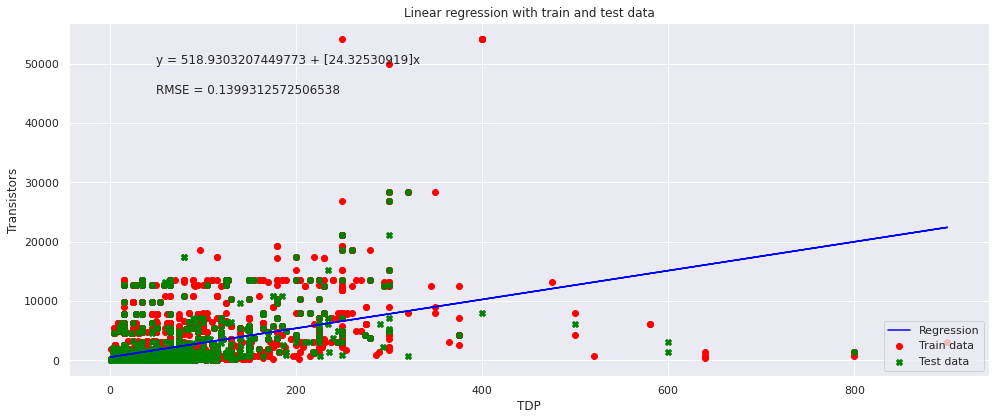

In [ ]:
# y = number of transistors, x = TDP
x = np.array(clean_dataset["TDP"]).reshape((-1,1))
y = np.array(clean_dataset["Transistors"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=123)
lr = LinearRegression().fit(x_train, y_train);
score = lr.score(x_test, y_test)
y_pred = lr.predict(x_test)
print(score)

plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.scatter(x_train, y_train, c ="red")
plt.scatter(x_test, y_test, c ="green", marker= 'X')
plt.legend(['Regression', 'Train data', 'Test data'], loc='lower right')
plt.title("Linear regression with train and test data")
plt.ylabel("Transistors")
plt.xlabel("TDP")
plt.text(50, 50000, 'y = ' + str(lr.intercept_) + ' + ' + str(lr.coef_) + 'x')
plt.text(50, 45000, 'RMSE = ' + str(score))
plt.show()

In [ ]:
# y = number of transistors, x = Frequency
x = np.array(clean_dataset["Freq"]).reshape((-1,1))
y = np.array(clean_dataset["Transistors"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=123)
lr = LinearRegression().fit(x_train, y_train);
score = lr.score(x_test, y_test)
y_pred = lr.predict(x_test)
print(score)

plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.scatter(x_train, y_train, c ="red")
plt.scatter(x_test, y_test, c ="green", marker= 'X')
plt.legend(['Regression', 'Train data', 'Test data'], loc='lower right')
plt.title("Linear regression with train and test data")
plt.ylabel("Transistors")
plt.xlabel("Freq")
plt.text(50, 50000, 'y = ' + str(lr.intercept_) + ' + ' + str(lr.coef_) + 'x')
plt.text(50, 45000, 'RMSE = ' + str(score))
plt.show()

0.03712591226885331


We have seen in the previous graphs that the linear regression don't really serves a purpose here as the data is quite scattered. We think that this is due to the exponential nature of some of the column's data. We will now try another approach as to tackle this.



## Regression with logaritmic data

We now try the same technic but for scaled data as to repare the logarithmic scale of it.



In [ ]:
# There is a problem: 0 nm process size exist, which is impossible and impedes computation
min(sinnan1.iloc[:,0])

0.0

In [ ]:
log_tdp = []
log_die = []
log_trans = []

for i in range (len(sinnan1)):
  log_tdp.append(np.log(sinnan1.iloc[i,1]));
  log_die.append(np.log(sinnan1.iloc[i,2]));
  log_trans.append(np.log(sinnan1.iloc[i,3]));


In [ ]:
#Data transformation as to clean the datasetb
log_dataset = clean_dataset
log_dataset = log_dataset.drop(columns = ["Process_Size", "TDP", "Die_Size", "Transistors"])

log_dataset.insert(4, "TDP", log_tdp, True)
log_dataset.insert(5, "Die_Size", log_die, True)
log_dataset.insert(6, "Transistors", log_trans, True)

log_dataset

Product Type Release_Date    Freq       TDP  \
4421           Intel i815 Graphics  GPU   2000-01-01   133.0  3.667689   
4357               NVIDIA Vanta LT  GPU   2000-03-01   105.0  3.667689   
3074  Sony Playstation 2 GPU 250nm  GPU   2000-03-04   147.0  4.369448   
3721                ATI Radeon DDR  GPU   2000-04-01   166.0  3.135494   
3500         ATI Radeon 7200 64 MB  GPU   2000-04-01   166.0  3.135494   
...                            ...  ...          ...     ...       ...   
1707     Intel Xeon Platinum 8353H  CPU   2021-04-06  2500.0  5.010635   
2014         Intel Xeon Gold 6338N  CPU   2021-04-06  2200.0  5.220356   
34        Intel Xeon Platinum 8380  CPU   2021-04-06  2300.0  5.598422   
1438     Intel Xeon Platinum 8354H  CPU   2021-04-06  3100.0  5.323010   
887       Intel Xeon Platinum 8362  CPU   2021-04-06  2800.0  5.579730   

      Die_Size  Transistors Foundry  Vendor  Date  
4421  4.729886     3.402711   Intel   Intel  2000  
4357  4.499810     2.708050    TSMC  NVIDIA  2000  
3074  5.631212     3.988984    Sony   Other  2000  
3721  4.744932     3.401197    TSMC     ATI  2000  
3500  4.709530     3.401197    TSMC     ATI  2000  
...        ...          ...     ...     ...   ...  
1707  5.707387     9.506889   Intel   Intel  2021  
2014  5.707387     9.506889   Intel   Intel  2021  
34    5.707387     9.506889   Intel   Intel  2021  
1438  5.707387     9.506889   Intel   Intel  2021  
887   5.707387     9.506889   Intel   Intel  2021  

[4733 rows x 10 columns]

In [ ]:
# Fit regression model (using the natural log of one of the regressors)
results1 = smf.ols('Transistors ~ Die_Size', data=log_dataset).fit()
results2 = smf.ols('Transistors ~ TDP', data=log_dataset).fit()
results3 = smf.ols('Transistors ~ Freq', data=log_dataset).fit()


                            OLS Regression Results                            
Dep. Variable:            Transistors   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     2176.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:28:12   Log-Likelihood:                -8319.1
No. Observations:                4733   AIC:                         1.664e+04
Df Residuals:                    4731   BIC:                         1.666e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5825      0.176     -9.000      0.0

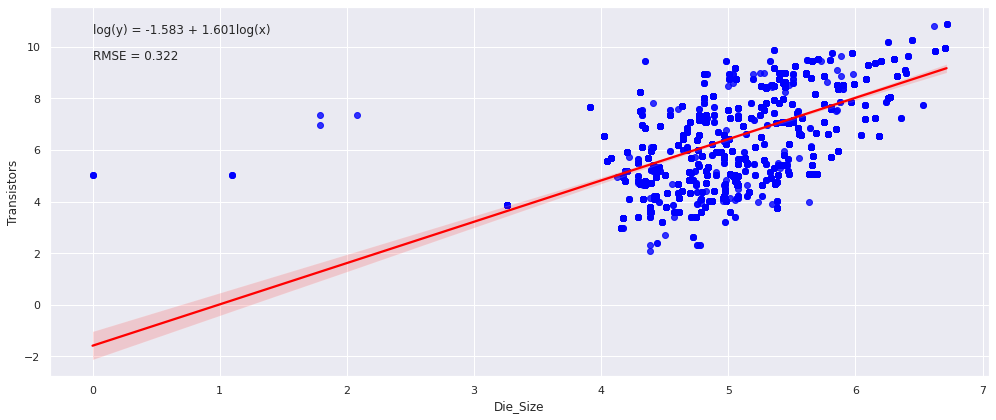

In [ ]:
# y = number of transistors, x = Die Size
x = clean_dataset["Die_Size"]
y = clean_dataset["Transistors"]

xlog_data = np.log(x)
ylog_data = np.log(y)

#Put up a regplot of the data as logarithm
p = sn.regplot(x=xlog_data, y=ylog_data, data=clean_dataset, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
plt.text(0, 10.5, 'log(y) = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'log(x)')
plt.text(0, 9.5, 'RMSE = ' + str(0.322)); "die_size"
print(results1.summary())

The model has improved a bit althought it still looks pretty bad. We now see different column combinations.

                            OLS Regression Results                            
Dep. Variable:            Transistors   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     354.7
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           2.37e-76
Time:                        16:28:13   Log-Likelihood:                -9043.3
No. Observations:                4733   AIC:                         1.809e+04
Df Residuals:                    4731   BIC:                         1.810e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5137      0.111     40.510      0.0

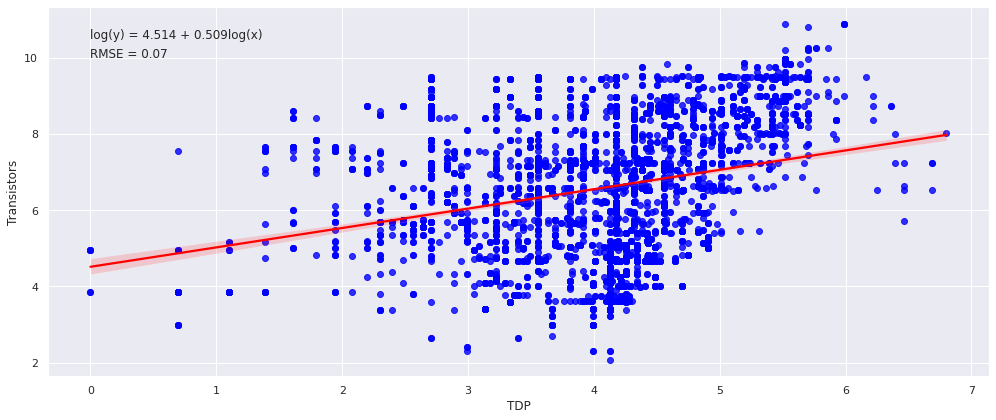

In [ ]:
# y = number of transistors, x = TDP
x = clean_dataset["TDP"]
y = clean_dataset["Transistors"]

xlog_data = np.log(x)
ylog_data = np.log(y)

#Put up a regplot of the data as logarithm
p = sn.regplot(x=xlog_data, y=ylog_data, data=clean_dataset, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
plt.text(0, 10.5, 'log(y) = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'log(x)')
plt.text(0, 10, 'RMSE = ' + str(0.070)); "tdp"
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:            Transistors   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     249.0
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.05e-54
Time:                        16:28:14   Log-Likelihood:                -9093.0
No. Observations:                4733   AIC:                         1.819e+04
Df Residuals:                    4731   BIC:                         1.820e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0358      0.041    146.540      0.0

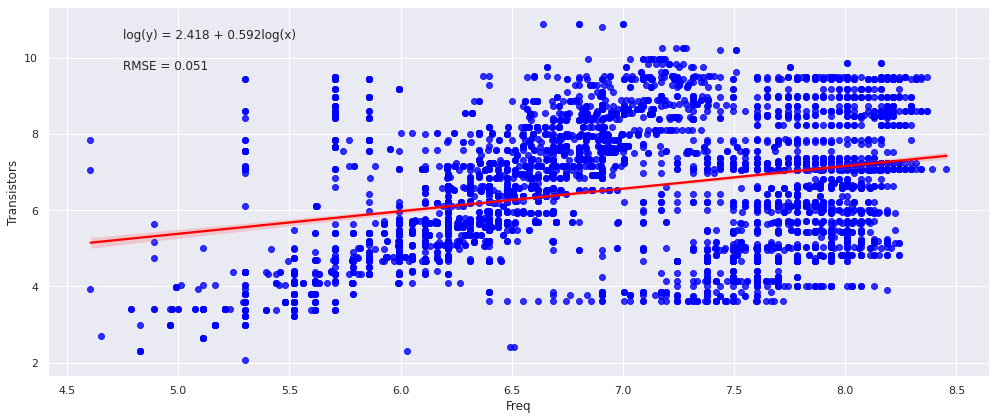

In [ ]:
# y = number of transistors, x = Frequency
x = clean_dataset["Freq"]
y = clean_dataset["Transistors"]

xlog_data = np.log(x)
ylog_data = np.log(y)

#Put up a regplot of the data as logarithm
p = sn.regplot(x=xlog_data, y=ylog_data, data=clean_dataset, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
plt.text(4.75, 10.5, 'log(y) = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'log(x)')
plt.text(4.75, 9.7, 'RMSE = ' + str(0.051)); "freq"
print(results3.summary())



Finally, we apply the regression model with logarithmic data divided into train and test set as to predict the transistor count variable.



In [ ]:
# y = number of transistors, x = Die Size
x = np.array(clean_dataset["Die_Size"]).reshape((-1,1))
y = np.array(clean_dataset["Transistors"])

xlog = np.log(x)
ylog = np.log(y)

x_train,x_test,y_train,y_test = train_test_split(xlog,ylog,test_size=.25,random_state=123)

# Linear Regression of train data
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train);
score = lr.score(x_test, y_test)
print(score)

#Prediciting Y from Linear regression Model
y_pred = lr.predict(x_test)

# Scatter Plot
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.scatter(x_train, y_train, c ="red")
plt.scatter(x_test, y_test, c ="green", marker= 'X')
plt.legend(['Regression', 'Train data', 'Test data'], loc='lower right')
plt.title("Linear regression with train and test data")
plt.ylabel("Transistors")
plt.xlabel("Die_Size")
plt.text(0, 10.5, 'log(y) = ' + str(lr.intercept_) + ' + ' + str(lr.coef_) + 'log(x)')
plt.text(0, 9.5, 'RMSE = ' + str(score))
plt.show()


0.30972518155883044


The root mean square error is now put at 0,309 with the logaritmic approach to the linear regression. This has not improved our 0,34 value without considering the logaritmic nature of the data. So this second approach is not much better. We will nonetheless, try to look for other predicting good relationships between other columns.

In [ ]:
# y = number of transistors, x = TDP
x = np.array(clean_dataset["TDP"]).reshape((-1,1))
y = np.array(clean_dataset["Transistors"])

xlog = np.log(x)
ylog = np.log(y)

x_train,x_test,y_train,y_test = train_test_split(xlog,ylog,test_size=.25,random_state=123)

# Linear Regression of train data
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train);
score = lr.score(x_test, y_test)
print(score)

#Prediciting Y from Linear regression Model
y_pred = lr.predict(x_test)

# Scatter Plot
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.scatter(x_train, y_train, c ="red")
plt.scatter(x_test, y_test, c ="green", marker= 'X')
plt.legend(['Regression', 'Train data', 'Test data'], loc='lower right')
plt.title("Linear regression with train and test data")
plt.ylabel("Transistors")
plt.xlabel("TDP")
plt.text(0, 10.5, 'log(y) = ' + str(lr.intercept_) + ' + ' + str(lr.coef_) + 'log(x)')
plt.text(0, 10, 'RMSE = ' + str(score))
plt.show()


0.0907150075223161


Was 0,13993 without logarithmic approach.

0.08335608448267706


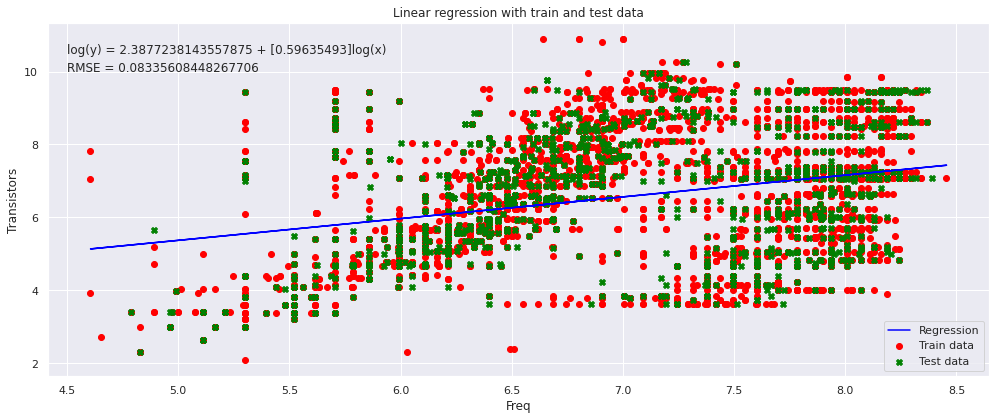

In [ ]:
# y = number of transistors, x = Frequency
x = np.array(clean_dataset["Freq"]).reshape((-1,1))
y = np.array(clean_dataset["Transistors"])

xlog = np.log(x)
ylog = np.log(y)

x_train,x_test,y_train,y_test = train_test_split(xlog,ylog,test_size=.25,random_state=123)

# Linear Regression of train data
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train);
score = lr.score(x_test, y_test)
print(score)

#Prediciting Y from Linear regression Model
y_pred = lr.predict(x_test)

# Scatter Plot
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.scatter(x_train, y_train, c ="red")
plt.scatter(x_test, y_test, c ="green", marker= 'X')
plt.legend(['Regression', 'Train data', 'Test data'], loc='lower right')
plt.title("Linear regression with train and test data")
plt.ylabel("Transistors")
plt.xlabel("Freq")
plt.text(4.5, 10.5, 'log(y) = ' + str(lr.intercept_) + ' + ' + str(lr.coef_) + 'log(x)')
plt.text(4.5, 10, 'RMSE = ' + str(score))
plt.show()


Was 0,037 without logarithmic approach.

We have seen how applying some sort of logarithmic compensation didn't help our data for the most part, we will now abandon the regression methods and try to look at classification technics.



## Classification with logistic regression

In the supervised learning classification methods, we try to guess the category that the data belongs to. Our first approach is logistic regression which consists on a regression model for dependent variables or of distributed binomial responses.

In our dataset what we try to predict is if it a CPU or GPU.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.9898648648648649
Precision: 0.9926470588235294
Recall: 0.9854014598540146


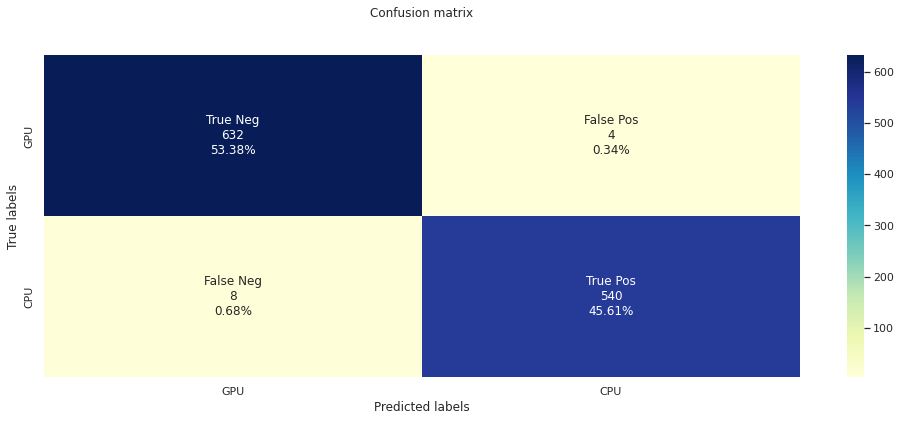

In [ ]:
#Import libraries
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y = clean_dataset1.Type_CPU.copy()    #The variable which we have to predict is a CPU, so 0=GPU and 1=CPU
X = clean_dataset1.drop(['Type_CPU','Type_GPU'],axis=1)   #The rest of the dataset will be used as a training dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123) #The dataset is split  Es separa el dataset en train i test

model = LogisticRegression()  #Carreguem el model de regresio
model.fit(X_train, y_train)   #Carreguem el dataset d'entrenament



y_pred = pd.Series(model.predict(X_test))   
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

#Mostrem els parametres de presicio y exactitud
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))



#Creem una matriu de confusio per mostrar els resultats
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

#Posem els noms als diferents labels de la matriu de confusio
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]

ax= plt.subplot()

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

#Creem la matriu amb seaborn
sn.heatmap(cnf_matrix,annot=labels, cmap="YlGnBu", fmt='',)
ax.xaxis.set_label_position("bottom")

#Posem les labels de CPU i GPU
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_ticklabels(['GPU', 'CPU']); ax.yaxis.set_ticklabels(['GPU', 'CPU']);


We see how after dividing the dataset into test and train dataset, we obtain the following results: 
*   True negative 53,38%, 
*   True positive  45,61%, 
*   False positive 0,34%
*   False negative 0,68%

So we can say that our model with logistic regression is pretty accurate.

We will now try a little game, were we introduce new market products which aren't present on the dataset and make the model predict if they are CPU or GPU. 





In [ ]:
#Process_Size	TDP	Die_Size	Transistors	Freq	AMD ATI INTEL NVIDIA Otro

prueba=X
prueba=prueba.drop(prueba.index)

NVIDIA_4060 = np.array([4,200,190,17000,2505,0,0,0,1,0])
NVIDIA_3060_Ti = np.array([8,200,392.5,17400,1410,0,0,0,1,0])
NVIDIA_3070_Ti = np.array([8,290,392.5,17400,1575,0,0,0,1,0])
NVIDIA_3080_Ti = np.array([8,350,628.4,23800,1365,0,0,0,1,0])
NVIDIA_3080 = np.array([8,320,628.4,23800,14400,0,0,0,1,0])
NVIDIA_3070 = np.array([8,220,392.5,17400,1500,0,0,0,1,0])
AMD_RADEON_6900=np.array([7,300,519,26800,1825,1,0,0,0,0])
AMD_RADEON_6700=np.array([7,230,355,17200,2321,1,0,0,0,0])
AMD_RADEON_6800=np.array([7,250,519,26800,1700,1,0,0,0,0])
AMD_RADEON_6600=np.array([7,160,237,11100,2359,1,0,0,0,0])
Ryzen_9_5950X=np.array([7,105,81,14400,3400,1,0,9,0,0])
Ryzen_Threadripper_3990X=[7,280,85,15400,2900,1,0,0,0,0]
Intel_Core_i7_11700K= [14,125,119.6,16800,3600,0,0,1,0,0]
Intel_Core_i5_11600K= [14,125,149.6,12400,3900,0,0,1,0,0]
Intel_Core_i9_11900K= [14,125,119.6,17200,3500,0,0,1,0,0]


prueba.loc[0] = Intel_Core_i7_11700K        #CPU
prueba.loc[1] = Ryzen_9_5950X               #CPU
prueba.loc[2] = Ryzen_Threadripper_3990X    #CPU
prueba.loc[3] = NVIDIA_4060                 #GPU
prueba.loc[4] = Intel_Core_i5_11600K        #CPU
prueba.loc[5] = Intel_Core_i9_11900K        #CPU
prueba.loc[6] = NVIDIA_3060_Ti              #GPU
prueba.loc[7] = NVIDIA_3070_Ti              #GPU
prueba.loc[8] = NVIDIA_3080_Ti              #GPU
prueba.loc[9] = NVIDIA_3070                 #GPU
prueba.loc[10] = NVIDIA_3080                #GPU
prueba.loc[11] = AMD_RADEON_6900            #GPU
prueba.loc[12] = AMD_RADEON_6700            #GPU
prueba.loc[13] = AMD_RADEON_6800            #GPU


print(prueba)


print("ey")
print(prueba[1:2])

predictionlogistic = model.predict(prueba) 
print("The prediction of the classifier is: ",['CPU' if val == 1 else 'GPU' for val in predictionlogistic])



    Process_Size    TDP  Die_Size  Transistors     Freq  Vendor_AMD  \
0           14.0  125.0     119.6      16800.0   3600.0         0.0   
1            7.0  105.0      81.0      14400.0   3400.0         1.0   
2            7.0  280.0      85.0      15400.0   2900.0         1.0   
3            4.0  200.0     190.0      17000.0   2505.0         0.0   
4           14.0  125.0     149.6      12400.0   3900.0         0.0   
5           14.0  125.0     119.6      17200.0   3500.0         0.0   
6            8.0  200.0     392.5      17400.0   1410.0         0.0   
7            8.0  290.0     392.5      17400.0   1575.0         0.0   
8            8.0  350.0     628.4      23800.0   1365.0         0.0   
9            8.0  220.0     392.5      17400.0   1500.0         0.0   
10           8.0  320.0     628.4      23800.0  14400.0         0.0   
11           7.0  300.0     519.0      26800.0   1825.0         1.0   
12           7.0  230.0     355.0      17200.0   2321.0         1.0   
13    

We see that our predicted observations are ['CPU', 'CPU', 'CPU', 'CPU', 'CPU', 'CPU', 'GPU', 'GPU', 'GPU', 'GPU', 'CPU', 'GPU', 'CPU', 'GPU']. If we compare with the real observation categories ['CPU', 'CPU', 'CPU', 'GPU', 'CPU', 'CPU', 'GPU', 'GPU', 'GPU', 'GPU', 'GPU', 'GPU', 'CPU', 'GPU'], we see that the 4rth and 11th observation are incorrect while the rest have been correctly predicted.

## Classificació amb XGBoost

We will now try the same problem than with logistic regression with a new approach, XGBoost, which is a methodology that has been the main driving force behind the algorithms that win massive ML competitions. Its speed and performance are unparalleled and it consistently outperforms any other algorithms aimed at supervised learning tasks.

Accuracy: 0.9966216216216216
Precision: 0.9945454545454545
Recall: 0.9981751824817519
The prediction of the classifier is:  ['CPU', 'CPU', 'CPU', 'CPU', 'CPU', 'CPU', 'GPU', 'GPU', 'GPU', 'GPU', 'GPU', 'GPU', 'GPU', 'GPU']


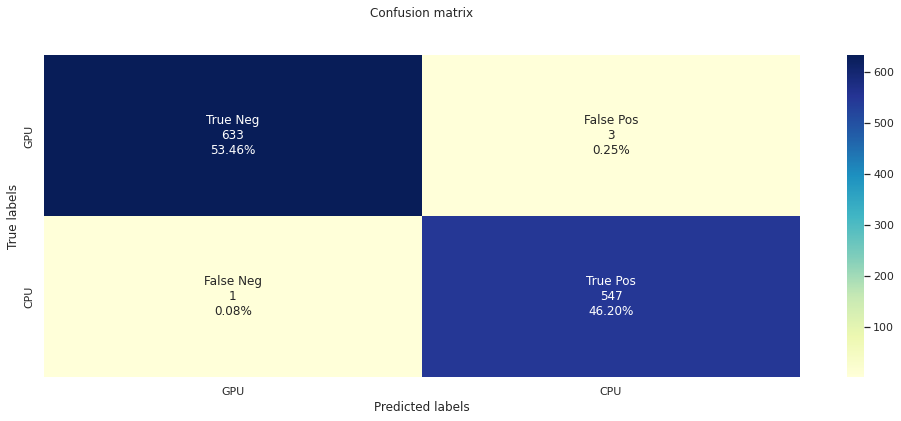

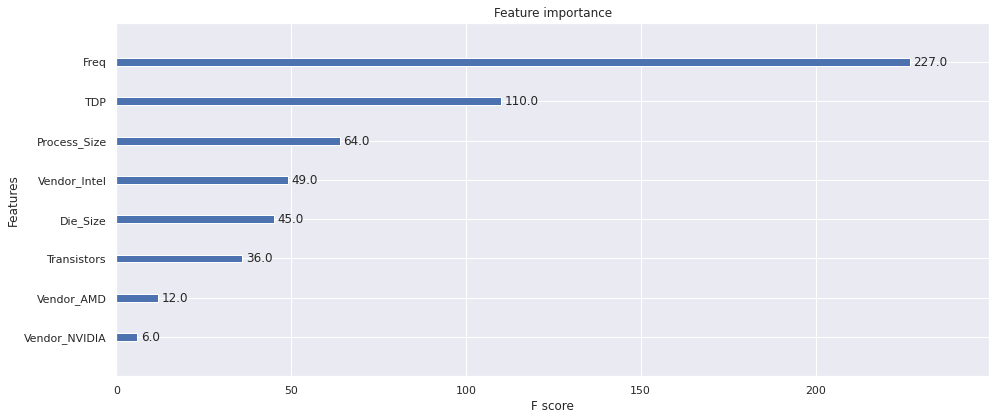

In [ ]:
#Importem llibraries de xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

#Carreguem el model i posem els datasets d
model = XGBClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]

ax= plt.subplot()


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


sn.heatmap(cnf_matrix,annot=labels, cmap="YlGnBu", fmt='',)
ax.xaxis.set_label_position("bottom")

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_ticklabels(['GPU', 'CPU']); ax.yaxis.set_ticklabels(['GPU', 'CPU']);

plot_importance(model, max_num_features=10)
#plt.show()




predictionXGBoost = model.predict(prueba) 

print("The prediction of the classifier is: ",['CPU' if val == 1 else 'GPU' for val in predictionXGBoost])


We can observe how the results are the following:

*   True negative **53,46%** (before 53,38%)
*   True positive  **46,2%** (before 45,61%)
*   False positive **0,25%** (before 0,34%)
*   False negative **0,08%** (before 0,68%)

Those are all better results than with the logistic regression aproach.

Furthermore, we have added a graph to visualize the importance of each column. We see how the frequency is the most important one in XGBoost.

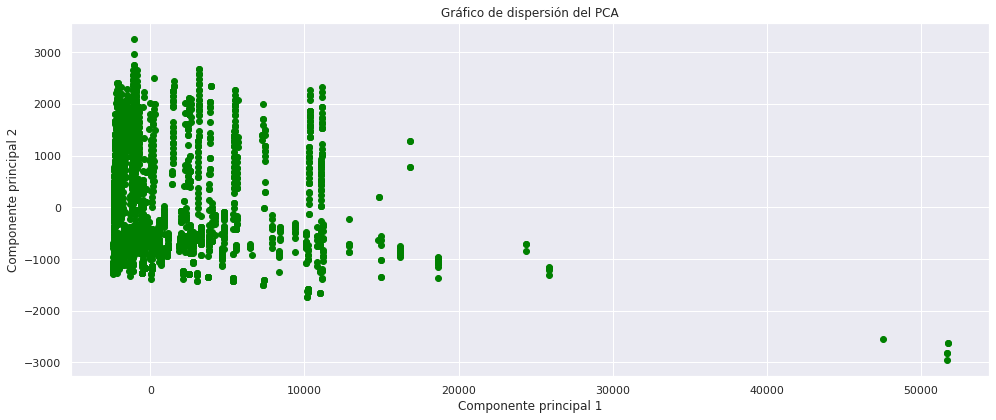

In [ ]:
#We hot encode our categorical data
one_hot_encoded_data = pd.get_dummies(clean_dataset, columns = ['Type','Vendor'])
(one_hot_encoded_data)

#Process_Size	TDP	Die_Size	Transistors	Freq
#We remove the categorical data that hasnt been encoded
clean_dataset2=one_hot_encoded_data.iloc[:, [2, 3, 4, 5, 6]]



from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(clean_dataset2)

clean_dataset2_pca = pca.transform(clean_dataset2)
#Make an scatter plot of the pca information
plt.scatter(clean_dataset1_pca[:, 0], clean_dataset1_pca[:, 1], c ='green')


#We define the labels
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Gráfico de dispersión del PCA')

#Plot the PCA
plt.show()

In [ ]:
print(clean_dataset)

                           Product Type Release_Date  Process_Size        TDP  \
4421           Intel i815 Graphics  GPU   2000-01-01         150.0   39.16129   
4357               NVIDIA Vanta LT  GPU   2000-03-01         250.0   39.16129   
3074  Sony Playstation 2 GPU 250nm  GPU   2000-03-04         250.0   79.00000   
3721                ATI Radeon DDR  GPU   2000-04-01         180.0   23.00000   
3500         ATI Radeon 7200 64 MB  GPU   2000-04-01         180.0   23.00000   
...                            ...  ...          ...           ...        ...   
1707     Intel Xeon Platinum 8353H  CPU   2021-04-06          14.0  150.00000   
2014         Intel Xeon Gold 6338N  CPU   2021-04-06          10.0  185.00000   
34        Intel Xeon Platinum 8380  CPU   2021-04-06          10.0  270.00000   
1438     Intel Xeon Platinum 8354H  CPU   2021-04-06          14.0  205.00000   
887       Intel Xeon Platinum 8362  CPU   2021-04-06          10.0  265.00000   

        Die_Size   Transist

# Unsupervised Learning

After having done 4 different approaches with supervised learning (which uses labeled datasets), we try now some unsupervised learning techniques (which uses non-labeled datasets).



## Dimensionality reduction

The first approach is to reduce the dimensionality of the problem. This objective will be achieved by running some Principal component analysis.

### PCA with  Process_Siz, TDP, Die_Size, Transistors, Freq (Non Scaled)

Our first principal component analysis consists in applying the model directly without scalling first the columns.

In [ ]:
#Import the uploaded dataset 
clean_dataset = pd.read_csv('/content/gdrive/My Drive/clean_dataset.csv')
clean_dataset=clean_dataset.drop(columns = ['Unnamed: 0'])

In [ ]:
#We hot encode our categorical data
one_hot_encoded_data = pd.get_dummies(clean_dataset, columns = ['Type','Vendor'])


clean_dataset1=one_hot_encoded_data.iloc[:, [2, 3, 4, 5, 6]]
clean_dataset2=one_hot_encoded_data.iloc[:, [2, 3, 4, 5, 6,11,12,13,14,15]]

#We define two functions that will translate out 5 hot encodede columns into 1. That will help us plot the data
def get_vendor(row):
    if row['Vendor_AMD'] == 1:
        return "AMD"
    elif row['Vendor_ATI'] == 1:
        return "ATI"
    elif row['Vendor_Intel'] == 1:
        return "Intel"
    elif row['Vendor_NVIDIA'] == 1:
        return "NVIDIA"
    else:
        return "Other"

#We define two functions that will translate out 2 hot encodede columns into 1. That will help us plot the data
def get_type(row):
    if row['Type_CPU'] == 1:
        return "CPU"
    else:
        return "GPU"

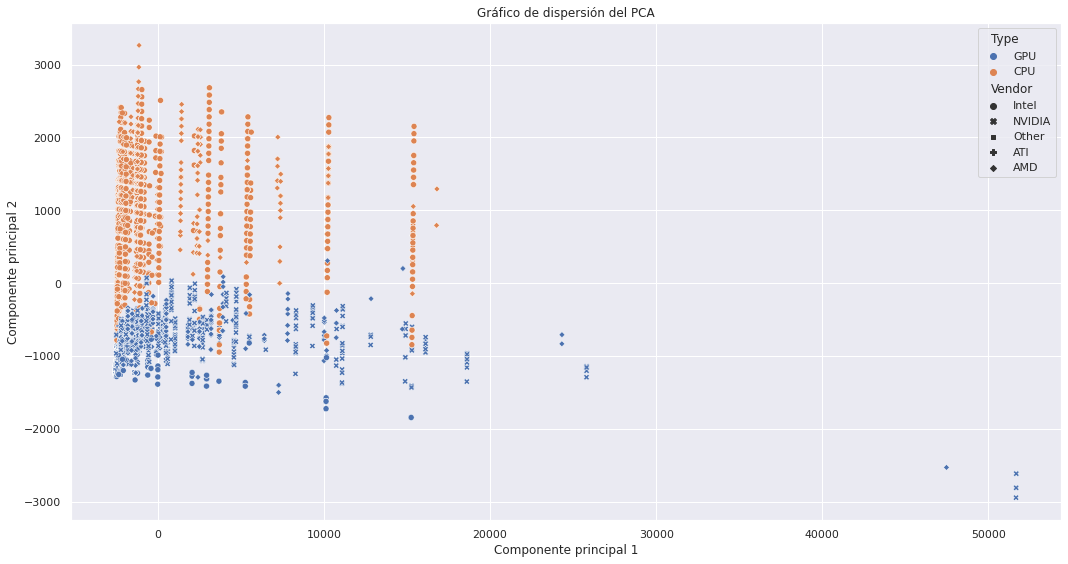

     0            1
0  PC1  Transistors
1  PC2    Frequency

Porcentaje de importancia de las variables de cada componente:
Componente 1: 94.40%
Componente 2: 5.53%


In [ ]:
# Copy the dataset with the data and inicialize the scaler
clean_pca= clean_dataset1.copy()
scaling=StandardScaler()
 


#We will do the PCA of the dataset

pca_complete = PCA(n_components=2).fit(clean_pca)

complete_dataset_pca = pca_complete.transform(clean_pca)

a = pd.DataFrame(complete_dataset_pca, columns=['Complete_PCA_x', 'Complete_PCA_y'])
a['Vendor']=one_hot_encoded_data.apply(lambda row: get_vendor(row), axis=1)
a['Type']=one_hot_encoded_data.apply(lambda row: get_type(row), axis=1)


#Make an scatter plot of the pca information

plt.figure(figsize=(15,8))
sn.scatterplot(data=a, x='Complete_PCA_x', y='Complete_PCA_y', style='Vendor', hue='Type')

#We define the labels
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Gráfico de dispersión del PCA')

#Plot the PCA
plt.show()

#We will higlight the most important variables on the pca
n_pcs= pca_complete.components_.shape[0]
variables = ['Process_Size','TDP','Die_Size','Transistors','Frequency'] #Names of the diferent variables

# with pca.components_[i] we get the 'importance' of each variable on the pca, if we pick the max it will give us the most important variable
most_important_index1 = [np.abs(pca_complete.components_[i]).argmax() for i in range(n_pcs)]
most_important_variable1 = [variables[int(i)] for i in (most_important_index1)] #With the index, we get the variable name
dic = {'PC{}'.format(i+1): most_important_variable1[i] for i in range(n_pcs)} #We create a dictionary with the PCAx and the most important variable

df = pd.DataFrame(dic.items())

print(df) 

variance_ratio = pca_complete.explained_variance_ratio_

# Imprimir los resultados
print("\nPorcentaje de importancia de las variables de cada componente:")
for i, ratio in enumerate(variance_ratio):
    print("Componente {}: {:.2%}".format(i + 1, ratio))

We see that this approach makes the data represented a little divided but it is still pretty intermingled and should need a new approach. 

### PCA with  Process_Siz, TDP, Die_Size, Transistors, Freq (Scaled)

The last approach made us think a new one is needed. This time we apply the same model but with the columns scaled as to account for their different magnitudes.

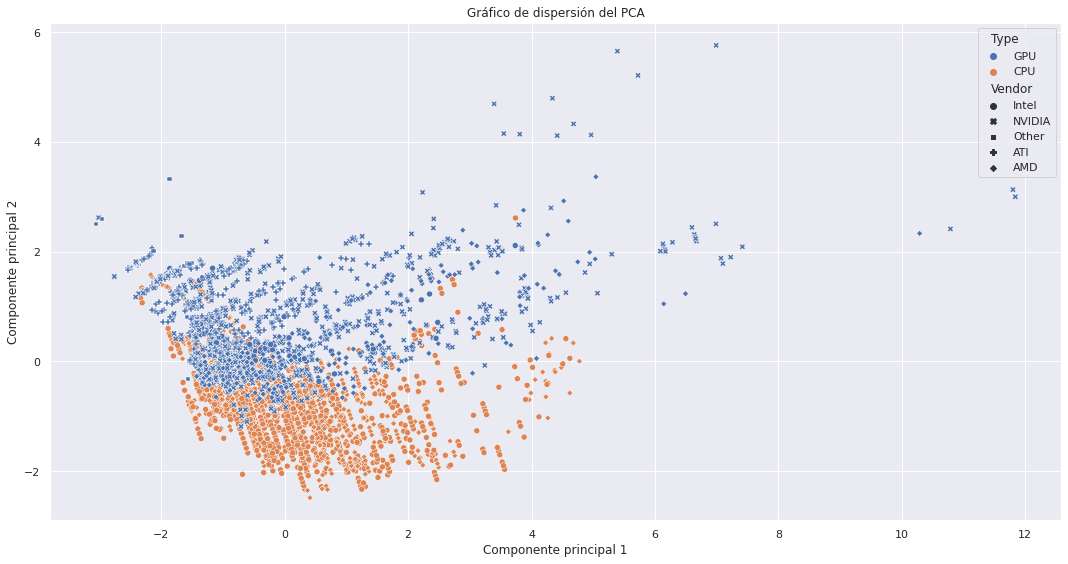

     0          1
0  PC1   Die_Size
1  PC2  Frequency

Porcentaje de importancia de las variables de cada componente:
Componente 1: 47.25%
Componente 2: 22.13%


In [ ]:
# Copy the dataset with the data and inicialize the scaler
clean_pca= clean_dataset1.copy()
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(clean_pca)
Scaled_clean_pca=scaling.transform(clean_pca)

#We will do the PCA of the dataset

pca_complete = PCA(n_components=2).fit(Scaled_clean_pca)

complete_dataset_pca = pca_complete.transform(Scaled_clean_pca)

a = pd.DataFrame(complete_dataset_pca, columns=['Complete_PCA_x', 'Complete_PCA_y'])
a['Vendor']=one_hot_encoded_data.apply(lambda row: get_vendor(row), axis=1)
a['Type']=one_hot_encoded_data.apply(lambda row: get_type(row), axis=1)


#Make an scatter plot of the pca information

plt.figure(figsize=(15,8))
sn.scatterplot(data=a, x='Complete_PCA_x', y='Complete_PCA_y', style='Vendor', hue='Type')

#We define the labels
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Gráfico de dispersión del PCA')

#Plot the PCA
plt.show()

#We will higlight the most important variables on the pca
n_pcs= pca_complete.components_.shape[0]
variables = ['Process_Size','TDP','Die_Size','Transistors','Frequency'] #Names of the diferent variables

# with pca.components_[i] we get the 'importance' of each variable on the pca, if we pick the max it will give us the most important variable
most_important_index1 = [np.abs(pca_complete.components_[i]).argmax() for i in range(n_pcs)]
most_important_variable1 = [variables[int(i)] for i in (most_important_index1)] #With the index, we get the variable name
dic = {'PC{}'.format(i+1): most_important_variable1[i] for i in range(n_pcs)} #We create a dictionary with the PCAx and the most important variable

df = pd.DataFrame(dic.items())

print(df) 

variance_ratio = pca_complete.explained_variance_ratio_

# Imprimir los resultados
print("\nPorcentaje de importancia de las variables de cada componente:")
for i, ratio in enumerate(variance_ratio):
    print("Componente {}: {:.2%}".format(i + 1, ratio))

This graph of the PCA seems a little more natural than with non-scaled values athought the data feels to have too much mixing.

### PCA with  Process_Siz, TDP, Die_Size, Transistors, Freq and Vendor (Scaled)

The last approach made us think a new one is needed. This time we apply the same model but with the columns scaled as to account for their different magnitudes.

With the following techniques we have included the vendor type. Once we have run it, we obtain very similar results with the peculiarity that the second most important factor is if the vendor is of a certain type. That is, we think, caused by the very big correlation between vendor and GPU/CPU type, as we discovered several chapters ago in this project (some vendors only sell GPUs). 
That makes us think that if we include the vendor as input in the clustering data. We would in its turn inccur in a newly created relationship between the vendor and the type, so we think that it makes our model biased. 

Ultimately, the previous chapter is thus preferable.

In [ ]:
# Copy the dataset with the data and inicialize the scaler
clean_pca= clean_dataset2.copy()
scaling=StandardScaler()
 
# Use fit, transform method and scaled
scaling.fit(clean_pca)
Scaled_clean_pca=scaling.transform(clean_pca)

#We will do the PCA of the dataset

pca_complete = PCA(n_components=2).fit(Scaled_clean_pca)

complete_dataset_pca = pca_complete.transform(Scaled_clean_pca)

a = pd.DataFrame(complete_dataset_pca, columns=['Complete_PCA_x', 'Complete_PCA_y'])
a['Vendor']=one_hot_encoded_data.apply(lambda row: get_vendor(row), axis=1)
a['Type']=one_hot_encoded_data.apply(lambda row: get_type(row), axis=1)


#Make an scatter plot of the pca information

plt.figure(figsize=(15,8))
sn.scatterplot(data=a, x='Complete_PCA_x', y='Complete_PCA_y', style='Vendor', hue='Type')

#We define the labels
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Gráfico de dispersión del PCA')

#Plot the PCA
plt.show()

#We will higlight the most important variables on the pca
n_pcs= pca_complete.components_.shape[0]
variables = ['Process_Size','TDP','Die_Size','Transistors','Frequency','AMD','ATI','Intel','NVIDIA','Other'] #Names of the diferent variables

# with pca.components_[i] we get the 'importance' of each variable on the pca, if we pick the max it will give us the most important variable
most_important_index1 = [np.abs(pca_complete.components_[i]).argmax() for i in range(n_pcs)]
most_important_variable1 = [variables[int(i)] for i in (most_important_index1)] #With the index, we get the variable name
dic = {'PC{}'.format(i+1): most_important_variable1[i] for i in range(n_pcs)} #We create a dictionary with the PCAx and the most important variable

df = pd.DataFrame(dic.items())

print(df) 

variance_ratio = pca_complete.explained_variance_ratio_

# Imprimir los resultados
print("\nPorcentaje de importancia de las variables de cada componente:")
for i, ratio in enumerate(variance_ratio):
    print("Componente {}: {:.2%}".format(i + 1, ratio))

     0            1
0  PC1  Transistors
1  PC2       NVIDIA

Porcentaje de importancia de las variables de cada componente:
Componente 1: 25.37%
Componente 2: 19.73%


## Clustering with K-Means

Our principal tool to achieve vector quantization, originally from signal processing is K-Means. This technique aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid).

First of all we try to guess which number of clusters is the optimal one. There are different approaches, the firts one to be applyed is the elbow method, which presents the most optimal value in the "elbow" of the graph.

In [ ]:
#Import libraries 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1 so each variable has equal importance when fitting the k-means algorithm.
scaled_df = StandardScaler().fit_transform(clean_dataset1)


#initialize kmeans parameters so we can choose the best number of k to cluster or datase
kmeans_kwargs = {"init": "random", "n_init": 10, "random_state": 1,}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SS_Error")
plt.title('K-means Elbow')
plt.show()

#We can see that the elbow is on k=4 so we will make 4 clusters


With the K-means Elbow, no "elbow" shape is to be found in the graph, so it doesn't seem a feasible method. We will now try for a different one.

In [ ]:
# A list holds the silhouette coefficients for each k

from sklearn.metrics import silhouette_score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The silouette method seems to be a little better than the elbow method and the optimal cluster number is presented as 2. 

Now, as to apply the unsupervised learning clustering with K-Means in our dataset, we try to make the k-means model determinate 2 clusters (in different colors). Then we will try to see if those 2 clusters coincide with the CPU / GPU division by giving them different shapes.

<Axes: xlabel='Date', ylabel='Transistors'>

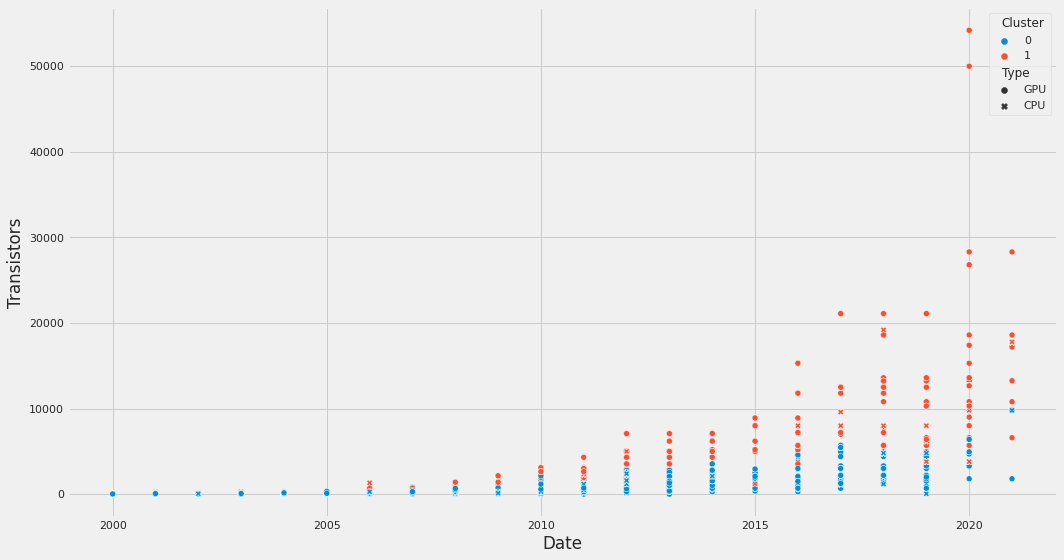

In [ ]:
#We will make a clustering algorithm using 2 clusters
kmeans_2 = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to our dataset
kmeans_2.fit(scaled_df)

#fWe create a new dataset
sup=clean_dataset2.copy()
#Create a column that tells the cluster
sup['Cluster']=kmeans_2.labels_
a['Cluster']=kmeans_2.labels_
#Add diferent columns that will help make plots 
sup['Date']=clean_dataset.iloc[:,10]
sup['Vendor']=one_hot_encoded_data.apply(lambda row: get_vendor(row), axis=1)
sup['Type']=one_hot_encoded_data.apply(lambda row: get_type(row), axis=1)

plt.figure(figsize=(15,8))
sn.scatterplot(data=a, x='Complete_PCA_x', y='Complete_PCA_y', style='Type', hue='Cluster')

print("\n")
plt.figure(figsize=(15,8))
sn.scatterplot(data=sup, x='Date', y='Transistors', hue='Cluster',style='Type')

#plt.figure(figsize=(15,8))
#sn.scatterplot(data=sup, x='Transistors', y='Freq', hue='Cluster',style='Type')

We can see how the 2 cluster division (blue and orange colors) don't reciprocate the CPU / GPU division (cross and circle shapes). We will now try with different number of clustering groups and other variables appart from CPU / GPU.

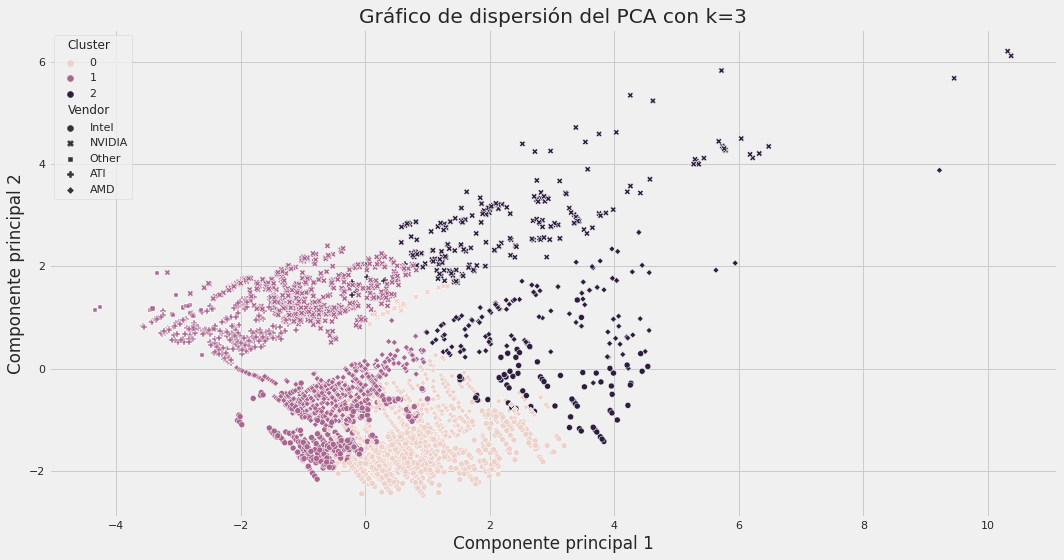

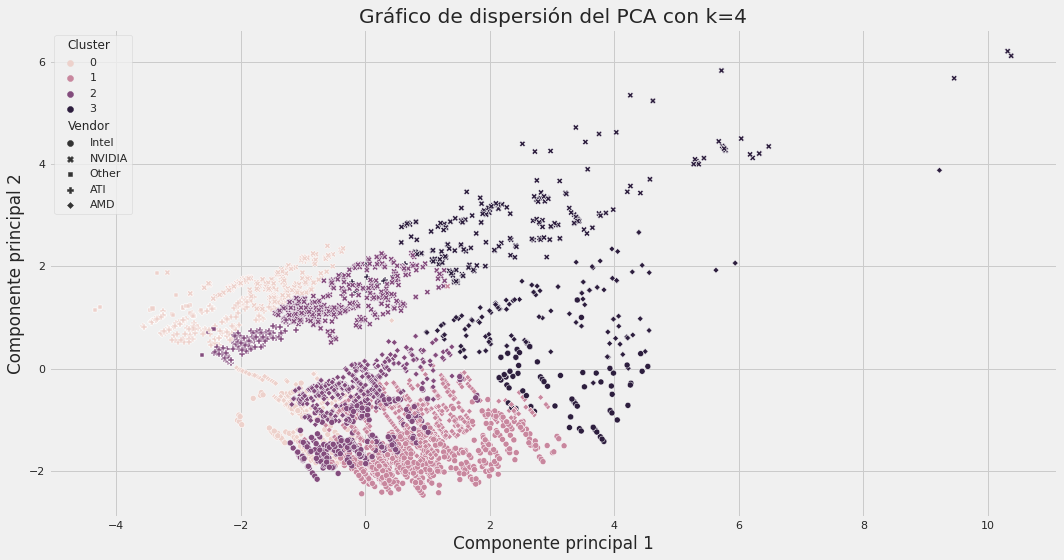

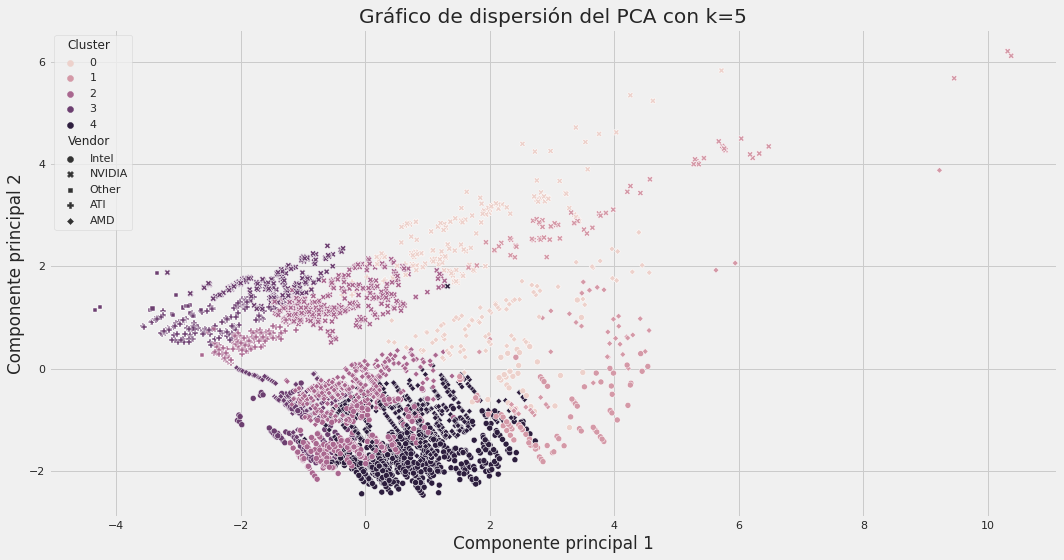

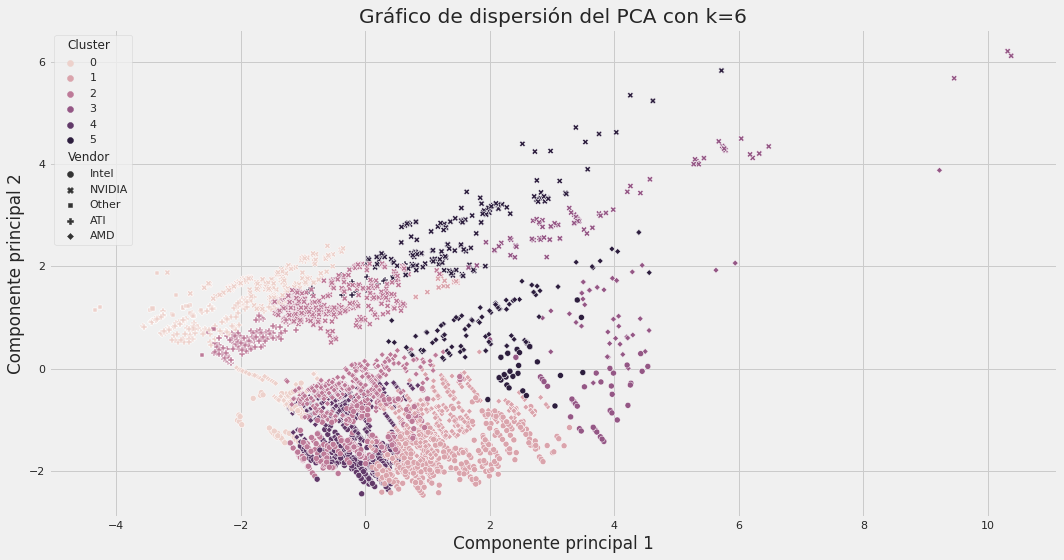

In [ ]:
for k in range(2,7):#loop 2 to 6
  #instantiate the k-means class, using our optimal number of clusters k=4
  kmeans_bucle = KMeans(init="random", n_clusters=k, n_init=10, random_state=1)

  #fit k-means algorithm to our dataset
  kmeans_bucle.fit(scaled_df)

  a = pd.DataFrame(complete_dataset_pca, columns=['Complete_PCA_x', 'Complete_PCA_y'])
  a['Vendor']=one_hot_encoded_data.apply(lambda row: get_vendor(row), axis=1)
  a['Type']=one_hot_encoded_data.apply(lambda row: get_type(row), axis=1)
  a['Cluster']=kmeans_bucle.labels_

  
  plt.figure(figsize=(15,8))
  sn.scatterplot(data=a, x='Complete_PCA_x', y='Complete_PCA_y', style='Vendor', hue='Cluster')
  #We define the labels
  plt.xlabel('Componente principal 1')
  plt.ylabel('Componente principal 2')
  plt.title('Gráfico de dispersión del PCA con k=' + str(k))

  #Plot the PCA

  plt.show()

With this new approach, when greater the number of clusters, it seems that corresponds a little with the different vendors, for example, with 6 clusters, the second cluster seems to take mostly circle shapes (intel), whereas cluster number 0 takes mostly NVIDIA and ATI.

## Agglomerative Clustering with a Cluster Dendogram

This clustering technique is a part of the hierarchical clustering algorithms. Initially, each point is a cluster on it's own, and gradually they are merged based of proximity until the desired number of clusters if attained.



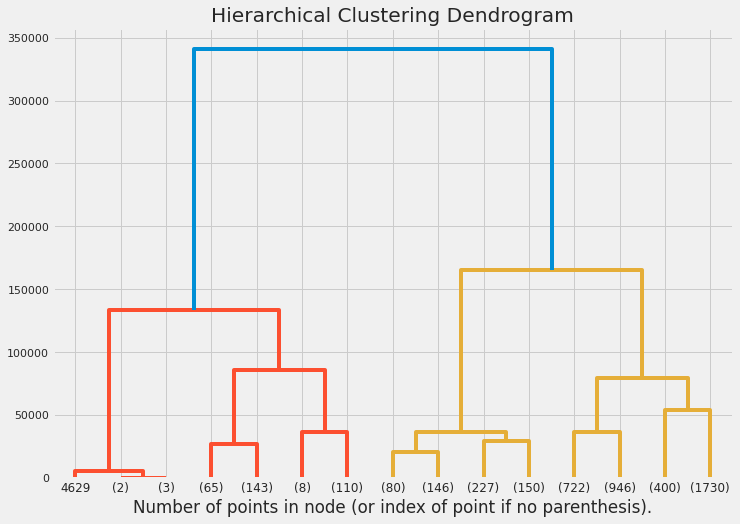

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

X = clean_dataset2
model = model.fit(X)

plt.rcParams["figure.figsize"] = [10.50, 7.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

With this dendogram, we can see how the clusters are formed by different sub-clusters, each with their own number of points.
Thanks to this we now know that our optimal number of clusters is 2.



## Non-linear Clustering: Spectral Clustering

On the previous aproach we have seen linear clustering in action. It's results have been promising so now we will try with non-linear clustering.

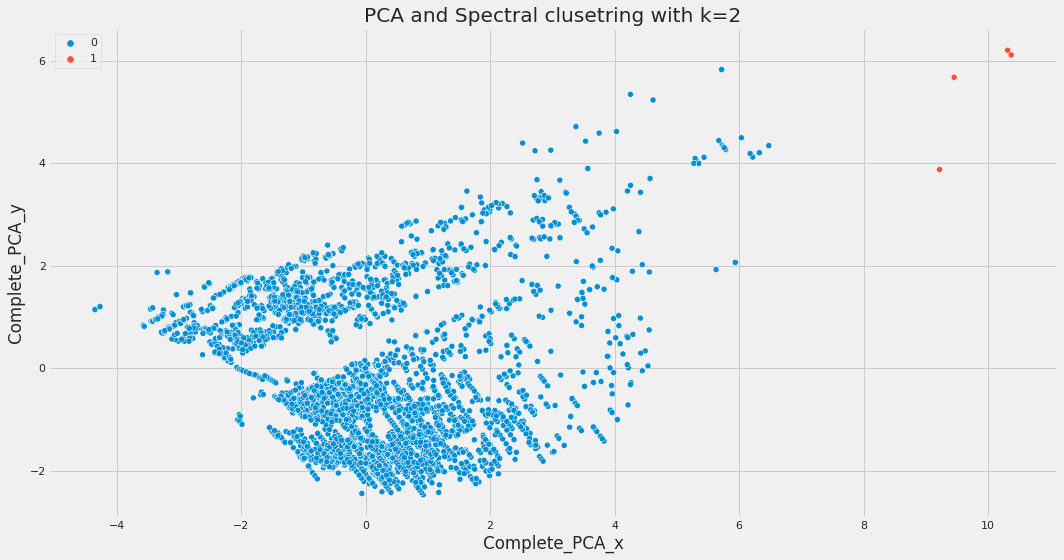

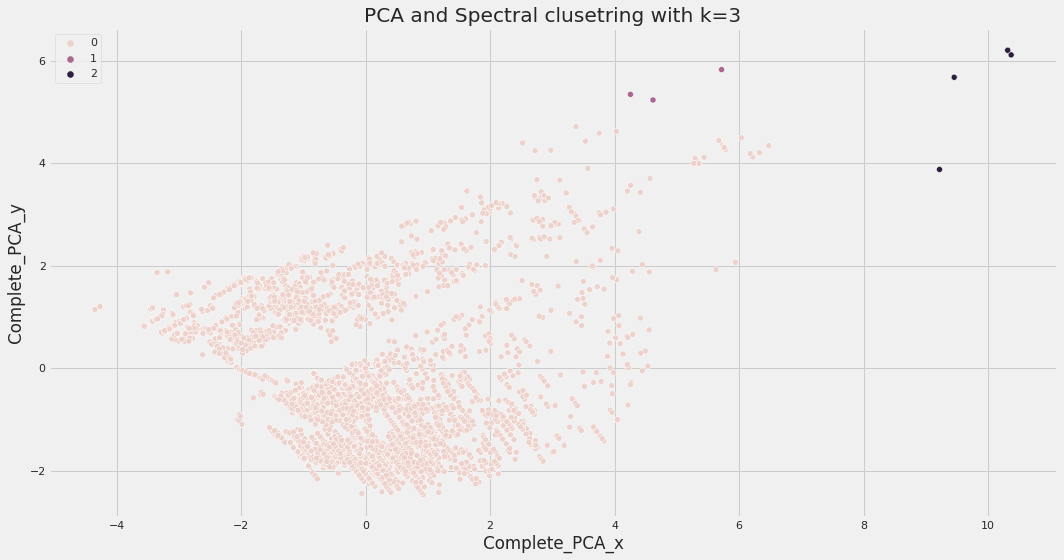

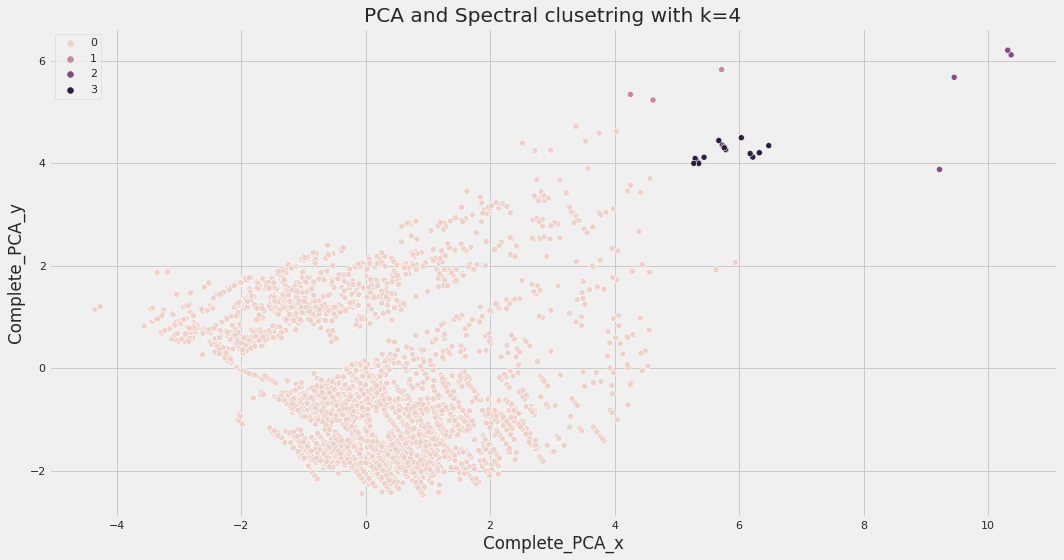

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import SpectralClustering

similarity_matrix = np.exp(-euclidean_distances(scaled_df))

for k in range(2,5):
    # Crear el objeto del modelo de clustering espectral
  
  spectral_model = SpectralClustering(n_clusters=k, affinity='precomputed')

  # Ajustar el modelo con la matriz de similitud
  spectral_model.fit(similarity_matrix)

  # Visualizar los resultados
  labels = spectral_model.labels_
  plt.figure(figsize=(15,8))
  sn.scatterplot(data=a, x='Complete_PCA_x', y='Complete_PCA_y', hue=labels)
  plt.title('PCA and Spectral clusetring with k=' + str(k))
  plt.show()

## Non-linear Clustering: Density Clustering

This other non-linera clustering technique refers to unsupervised machine learning methods that identify distinctive clusters in the data, based on the idea that a cluster/group in a data space is a contiguous region of high point density, separated from other clusters by sparse regions.

We try to put it in our project as a new clustering approach and try to see if it is useful.

In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


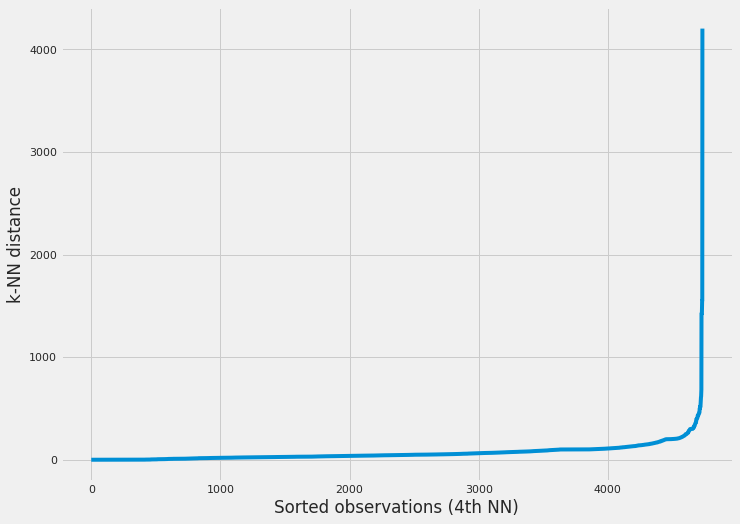

1424.5951846050864


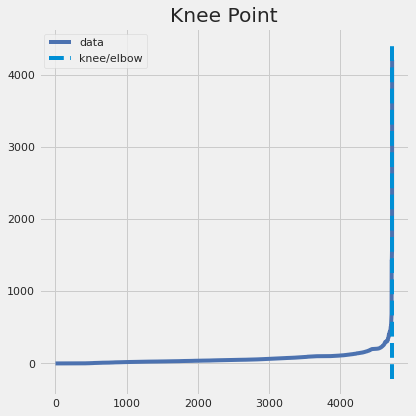

Estimated number of clusters: 3
Estimated number of noise points: 45


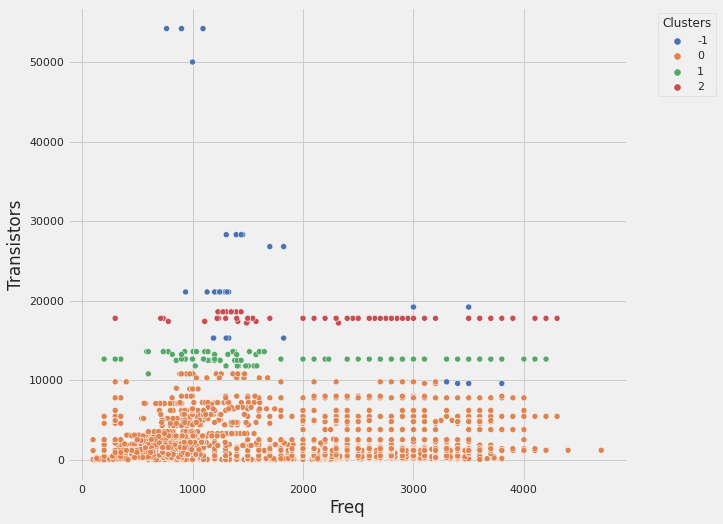

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors


# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
# clean = clean_dataset2.iloc[:, [0, 1, 2, 3, 4]]
clean = clean_dataset.iloc[:, [3, 4, 5, 6, 7]]
nbrs = NearestNeighbors(n_neighbors = 5).fit(clean)

# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(clean)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()


X = clean_dataset2
clusters = DBSCAN(eps=kneedle.knee_y, min_samples=50).fit(X)
labels = clusters.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


from collections import Counter
Counter(clusters.labels_)




p = sn.scatterplot(data = clean, x = "Freq", y = "Transistors", hue = clusters.labels_, legend = "full", palette = "deep")
sn.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

We have obtained clustering for 3 clusters, now we will try to do it por PCA values instead for transistor count vs Frequency as variables.

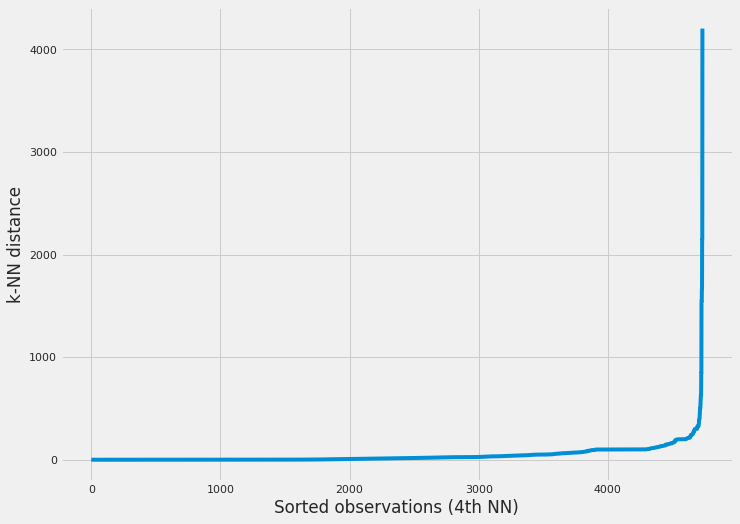

1669.656832035227


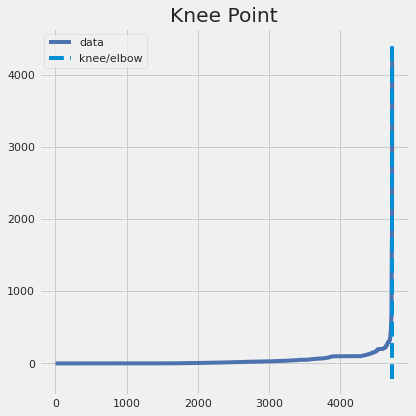

Estimated number of clusters: 2
Estimated number of noise points: 83


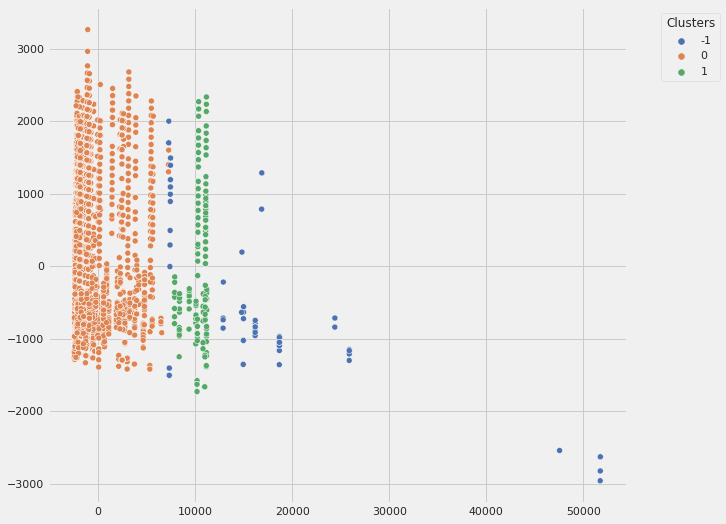

<function matplotlib.pyplot.show(close=None, block=None)>

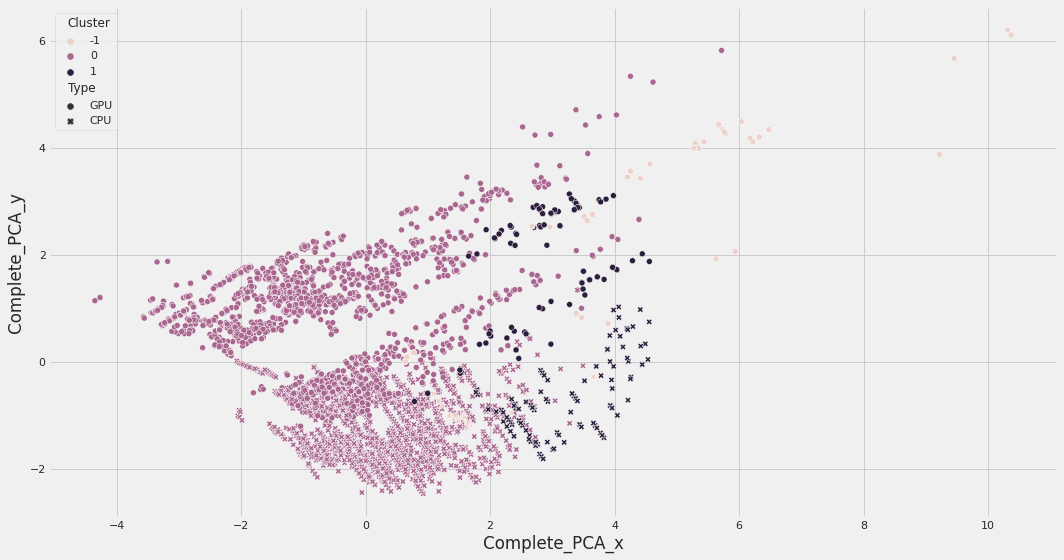

In [ ]:
# Density Clustering with PCA values


# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(clean_dataset1_pca)

# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(clean_dataset1_pca)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()


clusters = DBSCAN(eps=kneedle.knee_y, min_samples=100).fit(clean_dataset1_pca)
labels = clusters.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Counter(clusters.labels_)


p = sn.scatterplot(data = clean_dataset1_pca, x = clean_dataset1_pca[:,0].astype(int), y = clean_dataset1_pca[:,1].astype(int), hue = clusters.labels_, legend = "full", palette = "deep")
sn.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

a['Cluster']=labels
plt.figure(figsize=(15,8))
sn.scatterplot(data=a, x='Complete_PCA_x', y='Complete_PCA_y', style='Type', hue='Cluster')
plt.show



It also isn't quite a good predictor of GPU / CPU. We should try other approaches. In the next plots we will try the same technique but trying to predict the vendors.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Crear una matriz de ejemplo
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Crear una instancia del objeto PCA
pca = PCA()

# Ajustar y transformar los datos
pca.fit(X)
X_pca = pca.transform(X)

# Obtener el porcentaje de importancia de las variables de cada componente
variance_ratio = pca.explained_variance_ratio_

# Imprimir los resultados
print("Porcentaje de importancia de las variables de cada componente:")
for i, ratio in enumerate(variance_ratio):
    print("Componente {}: {:.2%}".format(i + 1, ratio))


Porcentaje de importancia de las variables de cada componente:
Componente 1: 100.00%
Componente 2: 0.00%
Componente 3: 0.00%


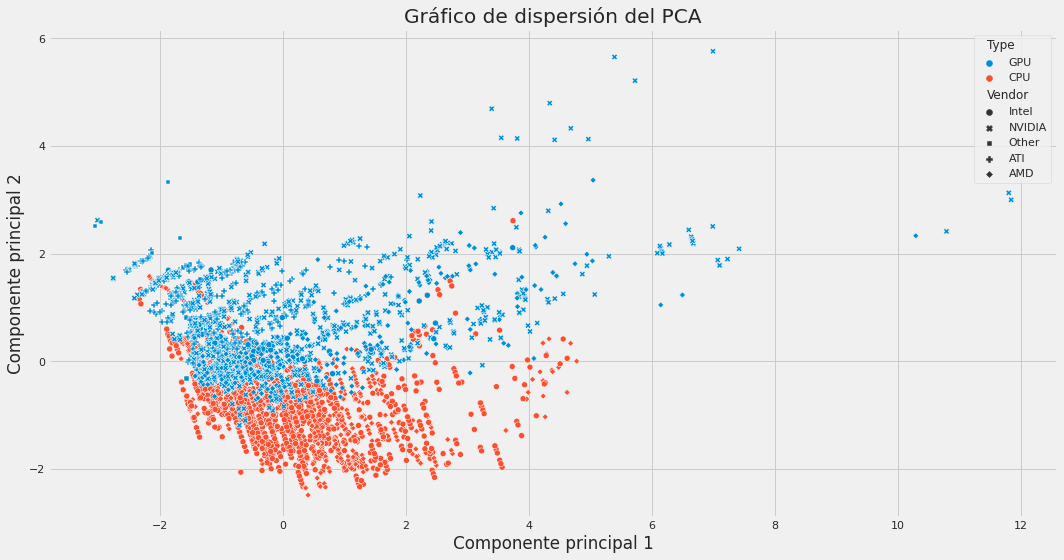

     0          1
0  PC1   Die_Size
1  PC2  Frequency

Porcentaje de importancia de las variables de cada componente:
Componente 1: 47.25%
Componente 2: 22.13%


In [ ]:
# Copy the dataset with the data and inicialize the scaler
clean_pca= clean_dataset1.copy()
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(clean_pca)
Scaled_clean_pca=scaling.transform(clean_pca)

#We will do the PCA of the dataset

pca_complete = PCA(n_components=2).fit(Scaled_clean_pca)

complete_dataset_pca = pca_complete.transform(Scaled_clean_pca)


a = pd.DataFrame(complete_dataset_pca, columns=['Complete_PCA_x', 'Complete_PCA_y'])
a['Vendor']=one_hot_encoded_data.apply(lambda row: get_vendor(row), axis=1)
a['Type']=one_hot_encoded_data.apply(lambda row: get_type(row), axis=1)


#Make an scatter plot of the pca information

plt.figure(figsize=(15,8))
sn.scatterplot(data=a, x='Complete_PCA_x', y='Complete_PCA_y', style='Vendor', hue='Type')

#We define the labels
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Gráfico de dispersión del PCA')

#Plot the PCA
plt.show()

#We will higlight the most important variables on the pca
n_pcs= pca_complete.components_.shape[0]
variables = ['Process_Size','TDP','Die_Size','Transistors','Frequency'] #Names of the diferent variables

# with pca.components_[i] we get the 'importance' of each variable on the pca, if we pick the max it will give us the most important variable
most_important_index1 = [np.abs(pca_complete.components_[i]).argmax() for i in range(n_pcs)]
most_important_variable1 = [variables[int(i)] for i in (most_important_index1)] #With the index, we get the variable name
dic = {'PC{}'.format(i+1): most_important_variable1[i] for i in range(n_pcs)} #We create a dictionary with the PCAx and the most important variable

df = pd.DataFrame(dic.items())

print(df) 

variance_ratio = pca_complete.explained_variance_ratio_

# Imprimir los resultados
print("\nPorcentaje de importancia de las variables de cada componente:")
for i, ratio in enumerate(variance_ratio):
    print("Componente {}: {:.2%}".format(i + 1, ratio))

As we said during data understanding, having the vendors as input or output is quite an exceptional situation, as for the most part some vendors only sell either GPUs or CPUs. Having that into account makes the modle very predictable. That said, this approach can be considerer very biased. 

The results are finally a little bit confusing.

# Conclusions

Here we made a little list of important conclusions made during the project.

*   Importance of data preparation and removing NaN values

*   Boxplots shows us that our dataset is asymmetric and some of its outliers are not really outliers just more modern data that compared to our early data seems to have hugely improved in all aspects.

*   Frequency is the predictor with the lowest RMSE value in GLM regressions

*   XGBoost has shown better results than logistic regression for classification problems, with up to 99,9% accuracy.

*   Frequency also has the highest featured importance in XGBoost.


*   PCA let us highlight the most important relationships between variables.

*   Normalized data makes better results in the PCA plot.

*   While the number of clusters could be determined, their meaning wasn’t quite clear. This has been the only major disappointment in the project.

